In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

In [3]:
train = pd.read_csv("data/train.csv", parse_dates = True)

In [4]:
train = train.sort_values(by='Date')  #sorting by date

In [5]:
train = train.reset_index(drop=True)

In [5]:
train.head(1000)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1115,2,2013-01-01,0,0,0,0,a,1
1,379,2,2013-01-01,0,0,0,0,a,1
2,378,2,2013-01-01,0,0,0,0,a,1
3,377,2,2013-01-01,0,0,0,0,a,1
4,376,2,2013-01-01,0,0,0,0,a,1
...,...,...,...,...,...,...,...,...,...
995,768,2,2013-01-01,0,0,0,0,a,1
996,769,2,2013-01-01,5035,1248,1,0,a,1
997,770,2,2013-01-01,0,0,0,0,a,1
998,771,2,2013-01-01,0,0,0,0,a,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
total_null = train.isnull().sum().sort_values(ascending = False)
total_null = total_null[total_null != 0]
percent_null = (train.isnull().sum().sort_values(ascending = False) / len(train)) * 100
percent_null = percent_null[percent_null != 0]
null_table = pd.concat([total_null, percent_null], axis = 1, keys = ['total', 'percent'])
null_table

,total,percent


Train has no null values

In [8]:
train['StateHoliday'].unique()

array(['a', '0', 'b', 'c', 0], dtype=object)

We can treat StateHoliday as Binary as there is no order for the holidays

In [9]:
train['StateHolidayOneHot'] = np.where(((train['StateHoliday'] == 'a') | (train['StateHoliday'] == 'b') | (train['StateHoliday'] == 'c')),1,0)

In [10]:
train['StateHolidayOneHot'].unique()

array([1, 0])

In [11]:
train.drop('StateHoliday', axis = 1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHolidayOneHot
0,1115,2,2013-01-01,0,0,0,0,1,1
1,379,2,2013-01-01,0,0,0,0,1,1
2,378,2,2013-01-01,0,0,0,0,1,1
3,377,2,2013-01-01,0,0,0,0,1,1
4,376,2,2013-01-01,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
1017204,746,5,2015-07-31,9082,638,1,1,1,0
1017205,747,5,2015-07-31,10708,826,1,1,1,0
1017206,748,5,2015-07-31,7481,578,1,1,1,0
1017207,742,5,2015-07-31,10460,1016,1,1,1,0


In [12]:
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train.Date.dt.year
train['Month'] = train.Date.dt.month
train['Day'] = train.Date.dt.day
train['WeekOfYear'] = train.Date.dt.isocalendar().week

In [13]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StateHolidayOneHot,Year,Month,Day,WeekOfYear
0,1115,2,2013-01-01,0,0,0,0,a,1,1,2013,1,1,1
1,379,2,2013-01-01,0,0,0,0,a,1,1,2013,1,1,1
2,378,2,2013-01-01,0,0,0,0,a,1,1,2013,1,1,1
3,377,2,2013-01-01,0,0,0,0,a,1,1,2013,1,1,1
4,376,2,2013-01-01,0,0,0,0,a,1,1,2013,1,1,1


In [14]:
closed_and_zero_sales = train[(train["Open"] == 0) & (train["Sales"] == 0)]
closed_and_zero_sales

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StateHolidayOneHot,Year,Month,Day,WeekOfYear
0,1115,2,2013-01-01,0,0,0,0,a,1,1,2013,1,1,1
1,379,2,2013-01-01,0,0,0,0,a,1,1,2013,1,1,1
2,378,2,2013-01-01,0,0,0,0,a,1,1,2013,1,1,1
3,377,2,2013-01-01,0,0,0,0,a,1,1,2013,1,1,1
4,376,2,2013-01-01,0,0,0,0,a,1,1,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014546,876,3,2015-07-29,0,0,0,1,0,1,0,2015,7,29,31
1015076,292,4,2015-07-30,0,0,0,1,0,1,0,2015,7,30,31
1015659,876,4,2015-07-30,0,0,0,1,0,1,0,2015,7,30,31
1016191,292,5,2015-07-31,0,0,0,1,0,1,0,2015,7,31,31


In [15]:
open_and_zero_sales =  train[(train["Open"] != 0) & (train["Sales"] == 0)]
open_and_zero_sales.shape

(54, 14)

In [16]:
train = train[(train["Open"] != 0) & (train["Sales"] != 0)] 

In [17]:
train.drop('Open', inplace = True, axis = 1)

In [18]:
train.head(1000)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StateHolidayOneHot,Year,Month,Day,WeekOfYear
27,353,2,2013-01-01,3139,820,0,a,1,1,2013,1,1,1
115,335,2,2013-01-01,2401,482,0,a,1,1,2013,1,1,1
147,512,2,2013-01-01,2646,625,0,a,1,1,2013,1,1,1
162,494,2,2013-01-01,3113,527,0,a,1,1,2013,1,1,1
199,530,2,2013-01-01,2907,532,0,a,1,1,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,796,3,2013-01-02,5993,621,0,0,1,0,2013,1,2,1
2096,795,3,2013-01-02,3800,443,0,0,1,0,2013,1,2,1
2097,794,3,2013-01-02,2991,544,0,0,1,0,2013,1,2,1
2098,793,3,2013-01-02,3473,362,0,0,1,0,2013,1,2,1


In [19]:
train.groupby('DayOfWeek')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,,,,,,,,
1,137557.0,8216.252259,3691.609734,133.0,5538.0,7539.0,10133.0,41551.0
2,143955.0,7088.409086,3065.959513,866.0,4960.0,6502.0,8521.0,34692.0
3,141922.0,6728.786679,2781.109588,760.0,4829.0,6210.0,7987.0,33151.0
4,134626.0,6768.214973,2763.625181,520.0,4900.0,6246.0,7987.0,38367.0
5,138633.0,7073.034133,2764.528736,775.0,5205.0,6581.0,8324.0,38722.0
6,144052.0,5875.084935,2852.537857,46.0,3925.0,5425.0,7232.0,31683.0
7,3593.0,8224.723908,6235.152960,286.0,3314.0,6876.0,11418.0,37376.0


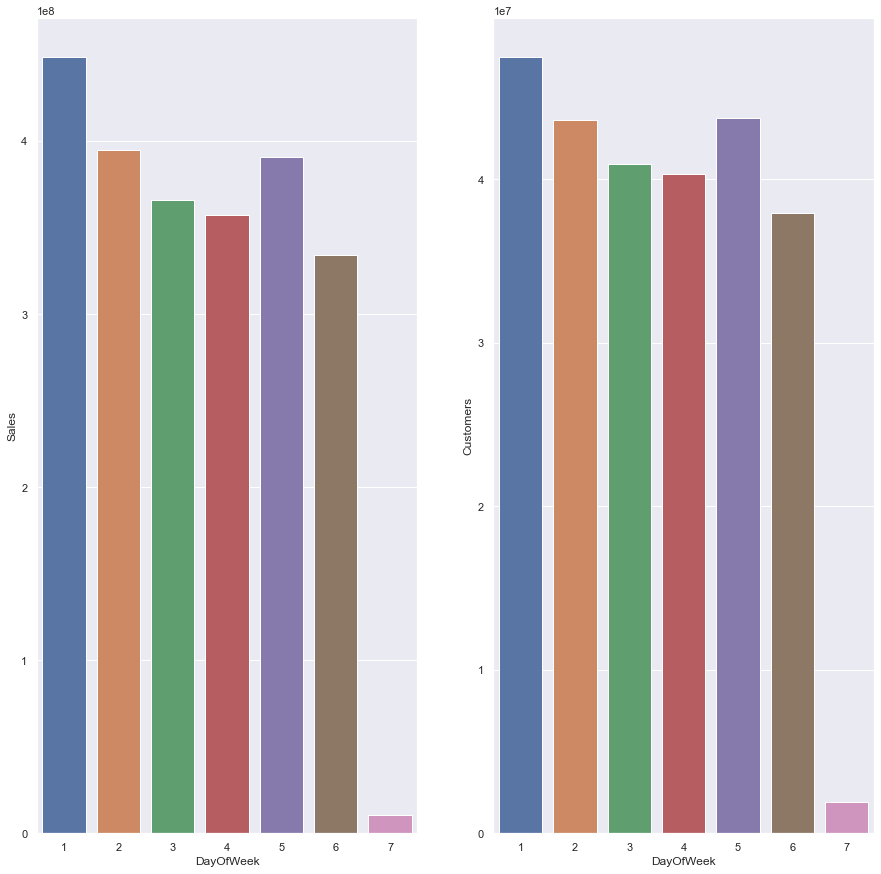

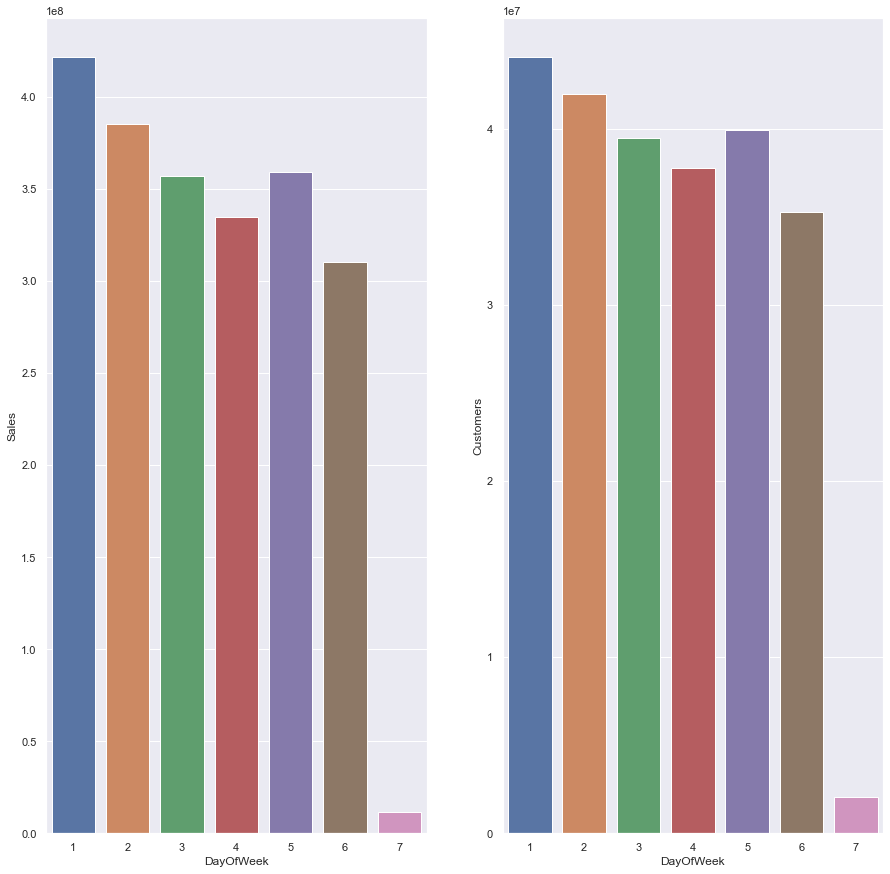

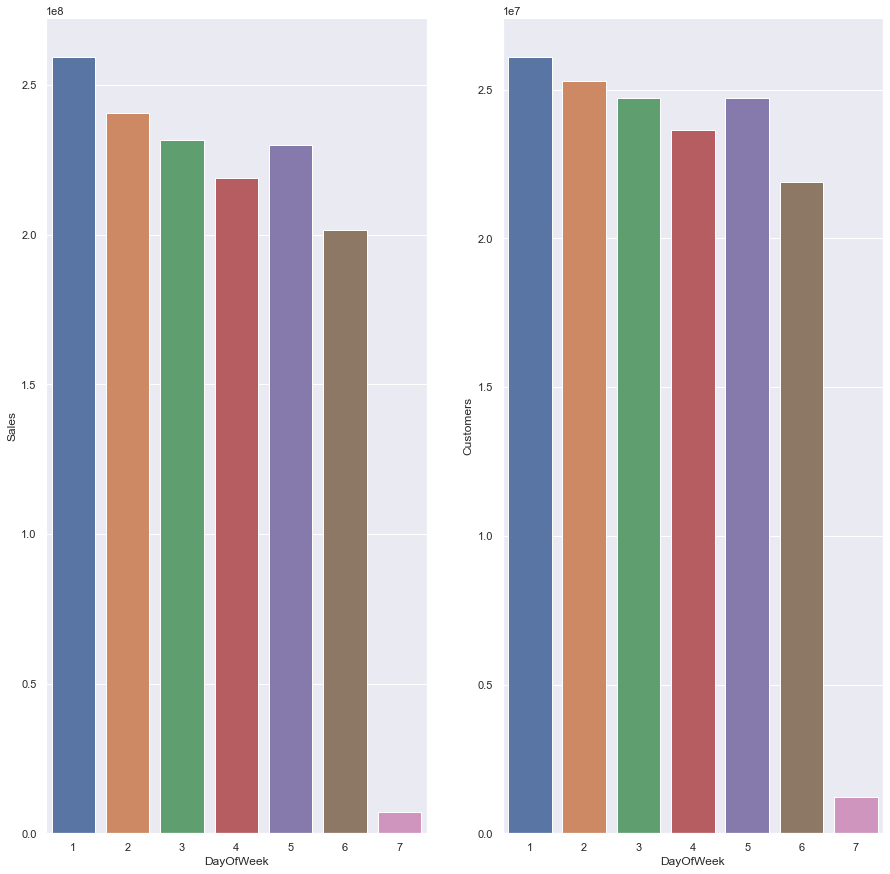

In [20]:
sns.set(rc={'figure.figsize':(1,3)})
years = [2013, 2014, 2015]
for i in years: 
    temp_df = pd.DataFrame(train[train['Year'] == i].groupby('DayOfWeek')['Sales', 'Customers'].sum())
    temp_df = temp_df.reset_index(level=0)
    f, axes = plt.subplots(1, 2, figsize=(15, 15), sharex=True)
    features = ['Sales', 'Customers']
    for ax, feature in zip(axes.flat, features):
        sns.barplot(x="DayOfWeek", y=feature, data=temp_df, ax = ax)

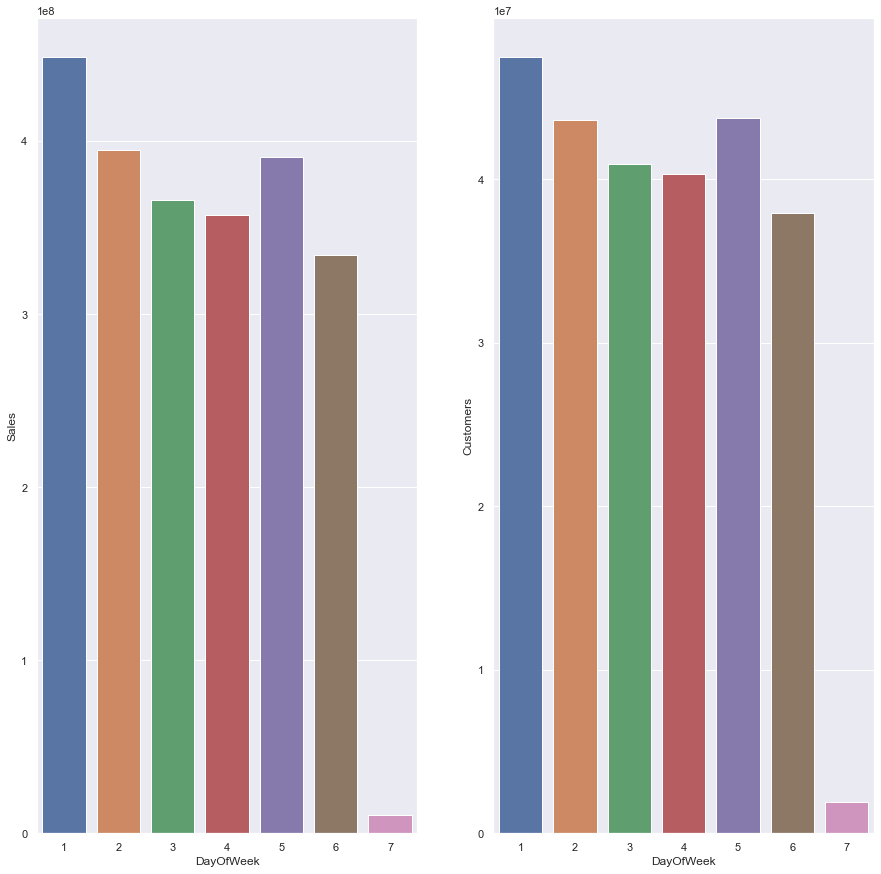

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
temp_df = pd.DataFrame(train[train['Year']==2013].groupby('DayOfWeek')['Sales', 'Customers'].sum())
temp_df = temp_df.reset_index(level=0)
f, axes = plt.subplots(1, 2, figsize=(15, 15), sharex=True)
features = ['Sales', 'Customers']
for ax, feature in zip(axes.flat, features):
    sns.barplot(x="DayOfWeek", y=feature, data=temp_df, ax = ax)

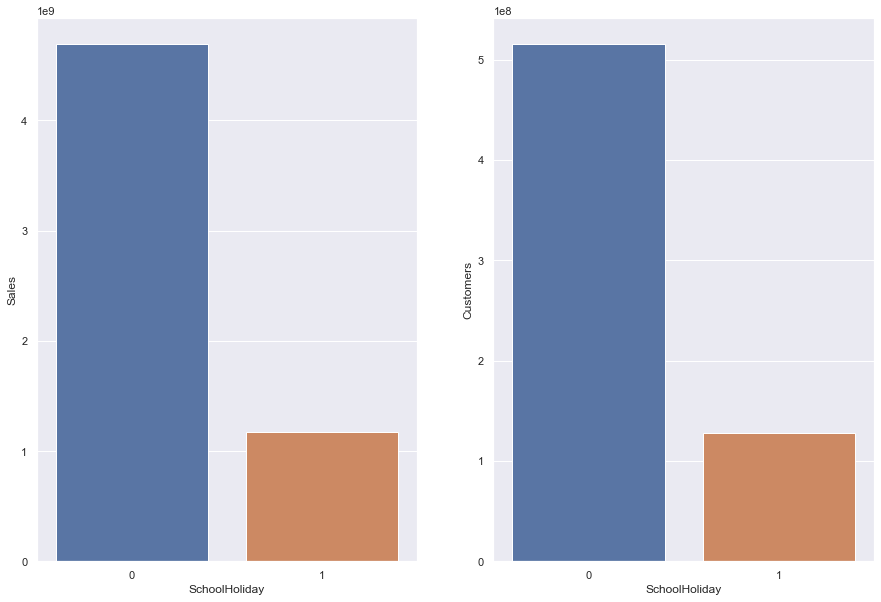

In [22]:
temp_df = pd.DataFrame(train.groupby('SchoolHoliday')['Sales', 'Customers'].sum())
temp_df = temp_df.reset_index(level=0)
f, axes = plt.subplots(1, 2, figsize=(15, 10), sharex=True)
features = ['Sales', 'Customers']
for ax, feature in zip(axes.flat, features):
    sns.barplot(x="SchoolHoliday", y=feature, data=temp_df, ax = ax) #keep

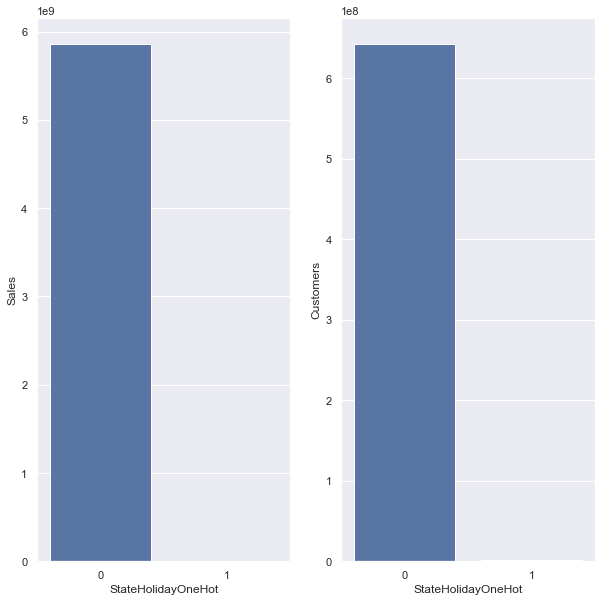

In [23]:
temp_df = pd.DataFrame(train.groupby('StateHolidayOneHot')['Sales', 'Customers'].sum())
temp_df = temp_df.reset_index(level=0)
f, axes = plt.subplots(1, 2, figsize=(10, 10), sharex=True)
features = ['Sales', 'Customers']
for ax, feature in zip(axes.flat, features):
    sns.barplot(x="StateHolidayOneHot", y=feature, data=temp_df, ax = ax) #keep

<AxesSubplot:xlabel='Month'>

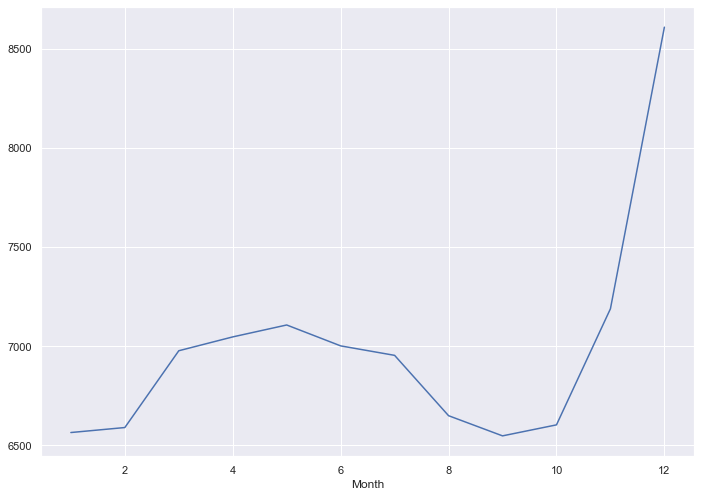

In [24]:
train.groupby('Month').mean()['Sales'].plot()

<AxesSubplot:xlabel='WeekOfYear'>

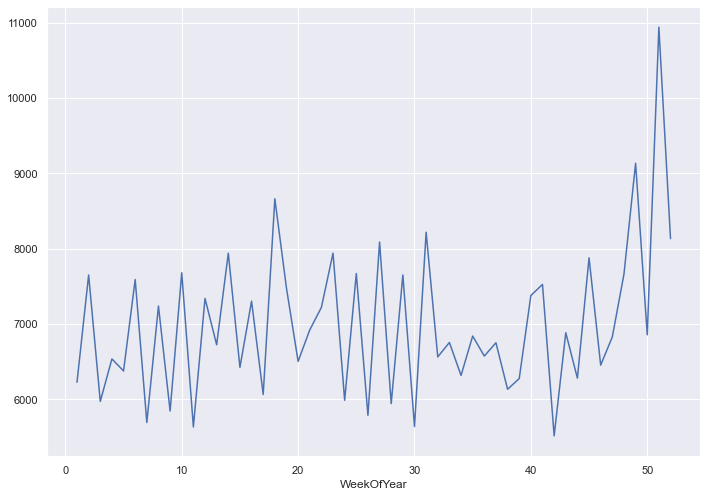

In [25]:
train.groupby('WeekOfYear').mean()['Sales'].plot()

In [6]:
store = pd.read_csv("data/store.csv")

In [27]:
store.head(10000)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [28]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [29]:
total_null = store.isnull().sum().sort_values(ascending = False)
total_null = total_null[total_null != 0]
percent_null = (store.isnull().sum().sort_values(ascending = False) / len(store)) * 100
percent_null = percent_null[percent_null != 0]
null_table = pd.concat([total_null, percent_null], axis = 1, keys = ['total', 'percent'])
null_table

,total,percent
Promo2SinceWeek,544,48.789238
Promo2SinceYear,544,48.789238
PromoInterval,544,48.789238
CompetitionOpenSinceMonth,354,31.748879
CompetitionOpenSinceYear,354,31.748879
CompetitionDistance,3,0.269058


In [30]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [31]:
store.loc[store['Promo2']== 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


This basically means that the stores that do not participate in Promo2 do not have the fields Promo2SinceWeek, Promo2SinceYear, PromoInterval which is intuitive

In [32]:
store['Promo2SinceWeek'].fillna(0, inplace = True)
store['Promo2SinceYear'].fillna(0, inplace = True)
store['PromoInterval'].fillna(0, inplace = True)

In [33]:
store.loc[store['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
5,6,a,a,310.0,12.0,2013.0,0,0.0,0.0,0
6,7,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,0.0,0.0,0
1109,1110,c,c,900.0,9.0,2010.0,0,0.0,0.0,0
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,NaN,NaN,0,0.0,0.0,0


Same thing for the 2 below columns

In [34]:
store['CompetitionOpenSinceMonth'].fillna(0, inplace = True)
store['CompetitionOpenSinceYear'].fillna(0, inplace = True) #Can remove this while training

In [35]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

In [36]:
train = train.sort_values(by='Date')

In [37]:
train_store.head(1000)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StateHolidayOneHot,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,353,2,2013-01-01,3139,820,0,a,1,1,2013,...,1,b,b,900.0,0.0,0.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
1,353,3,2013-01-02,2686,835,0,0,1,0,2013,...,1,b,b,900.0,0.0,0.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
2,353,4,2013-01-03,2628,815,0,0,1,0,2013,...,1,b,b,900.0,0.0,0.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
3,353,5,2013-01-04,2677,856,0,0,1,0,2013,...,1,b,b,900.0,0.0,0.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
4,353,6,2013-01-05,2224,719,0,0,0,0,2013,...,1,b,b,900.0,0.0,0.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,335,4,2013-03-07,15613,2885,1,0,0,0,2013,...,10,b,a,90.0,0.0,0.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
996,335,5,2013-03-08,14803,2898,1,0,0,0,2013,...,10,b,a,90.0,0.0,0.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
997,335,6,2013-03-09,8104,1733,0,0,0,0,2013,...,10,b,a,90.0,0.0,0.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
998,335,7,2013-03-10,6965,1377,0,0,0,0,2013,...,10,b,a,90.0,0.0,0.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"


<AxesSubplot:xlabel='Assortment', ylabel='Sales'>

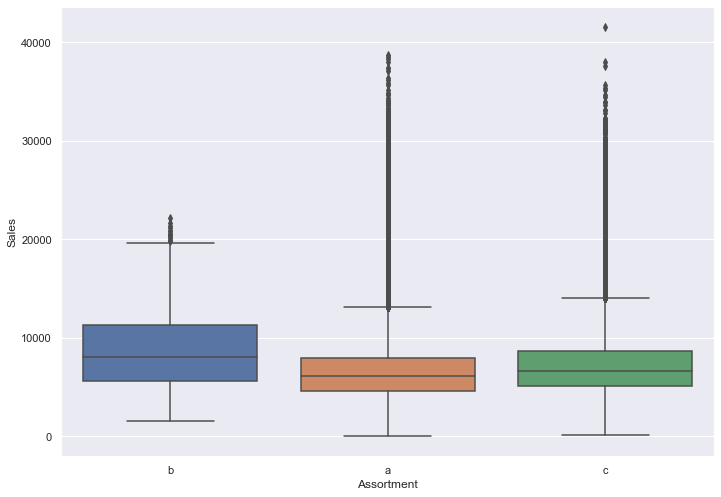

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot( x='Assortment',y = 'Sales', data = train_store)

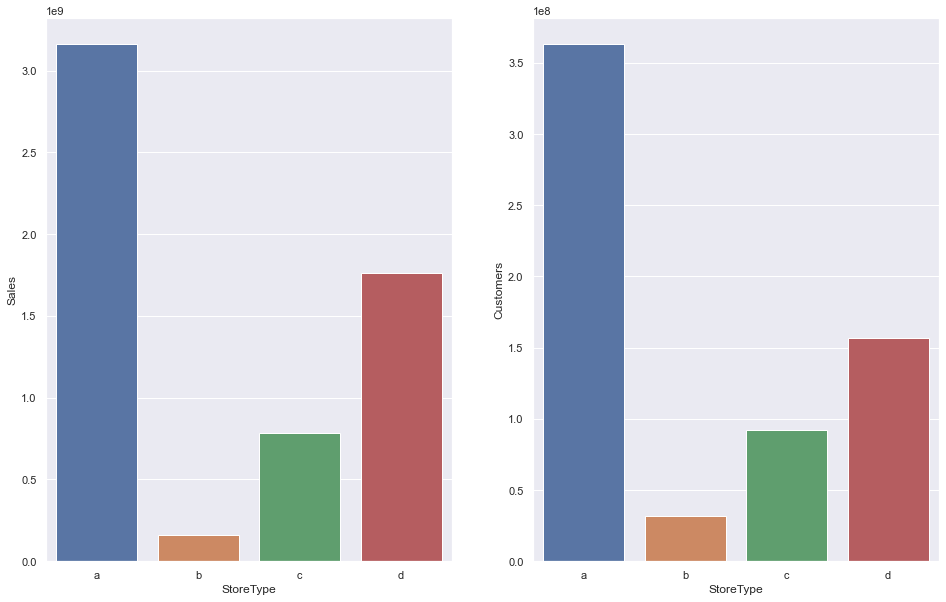

In [39]:
temp_df = pd.DataFrame(train_store.groupby('StoreType')['Sales', 'Customers'].sum())
temp_df = temp_df.reset_index(level=0)
f, axes = plt.subplots(1, 2, figsize=(16, 10), sharex=True)
features = ['Sales', 'Customers']
for ax, feature in zip(axes.flat, features):
    sns.barplot(x="StoreType", y=feature, data=temp_df, ax = ax)

In [40]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

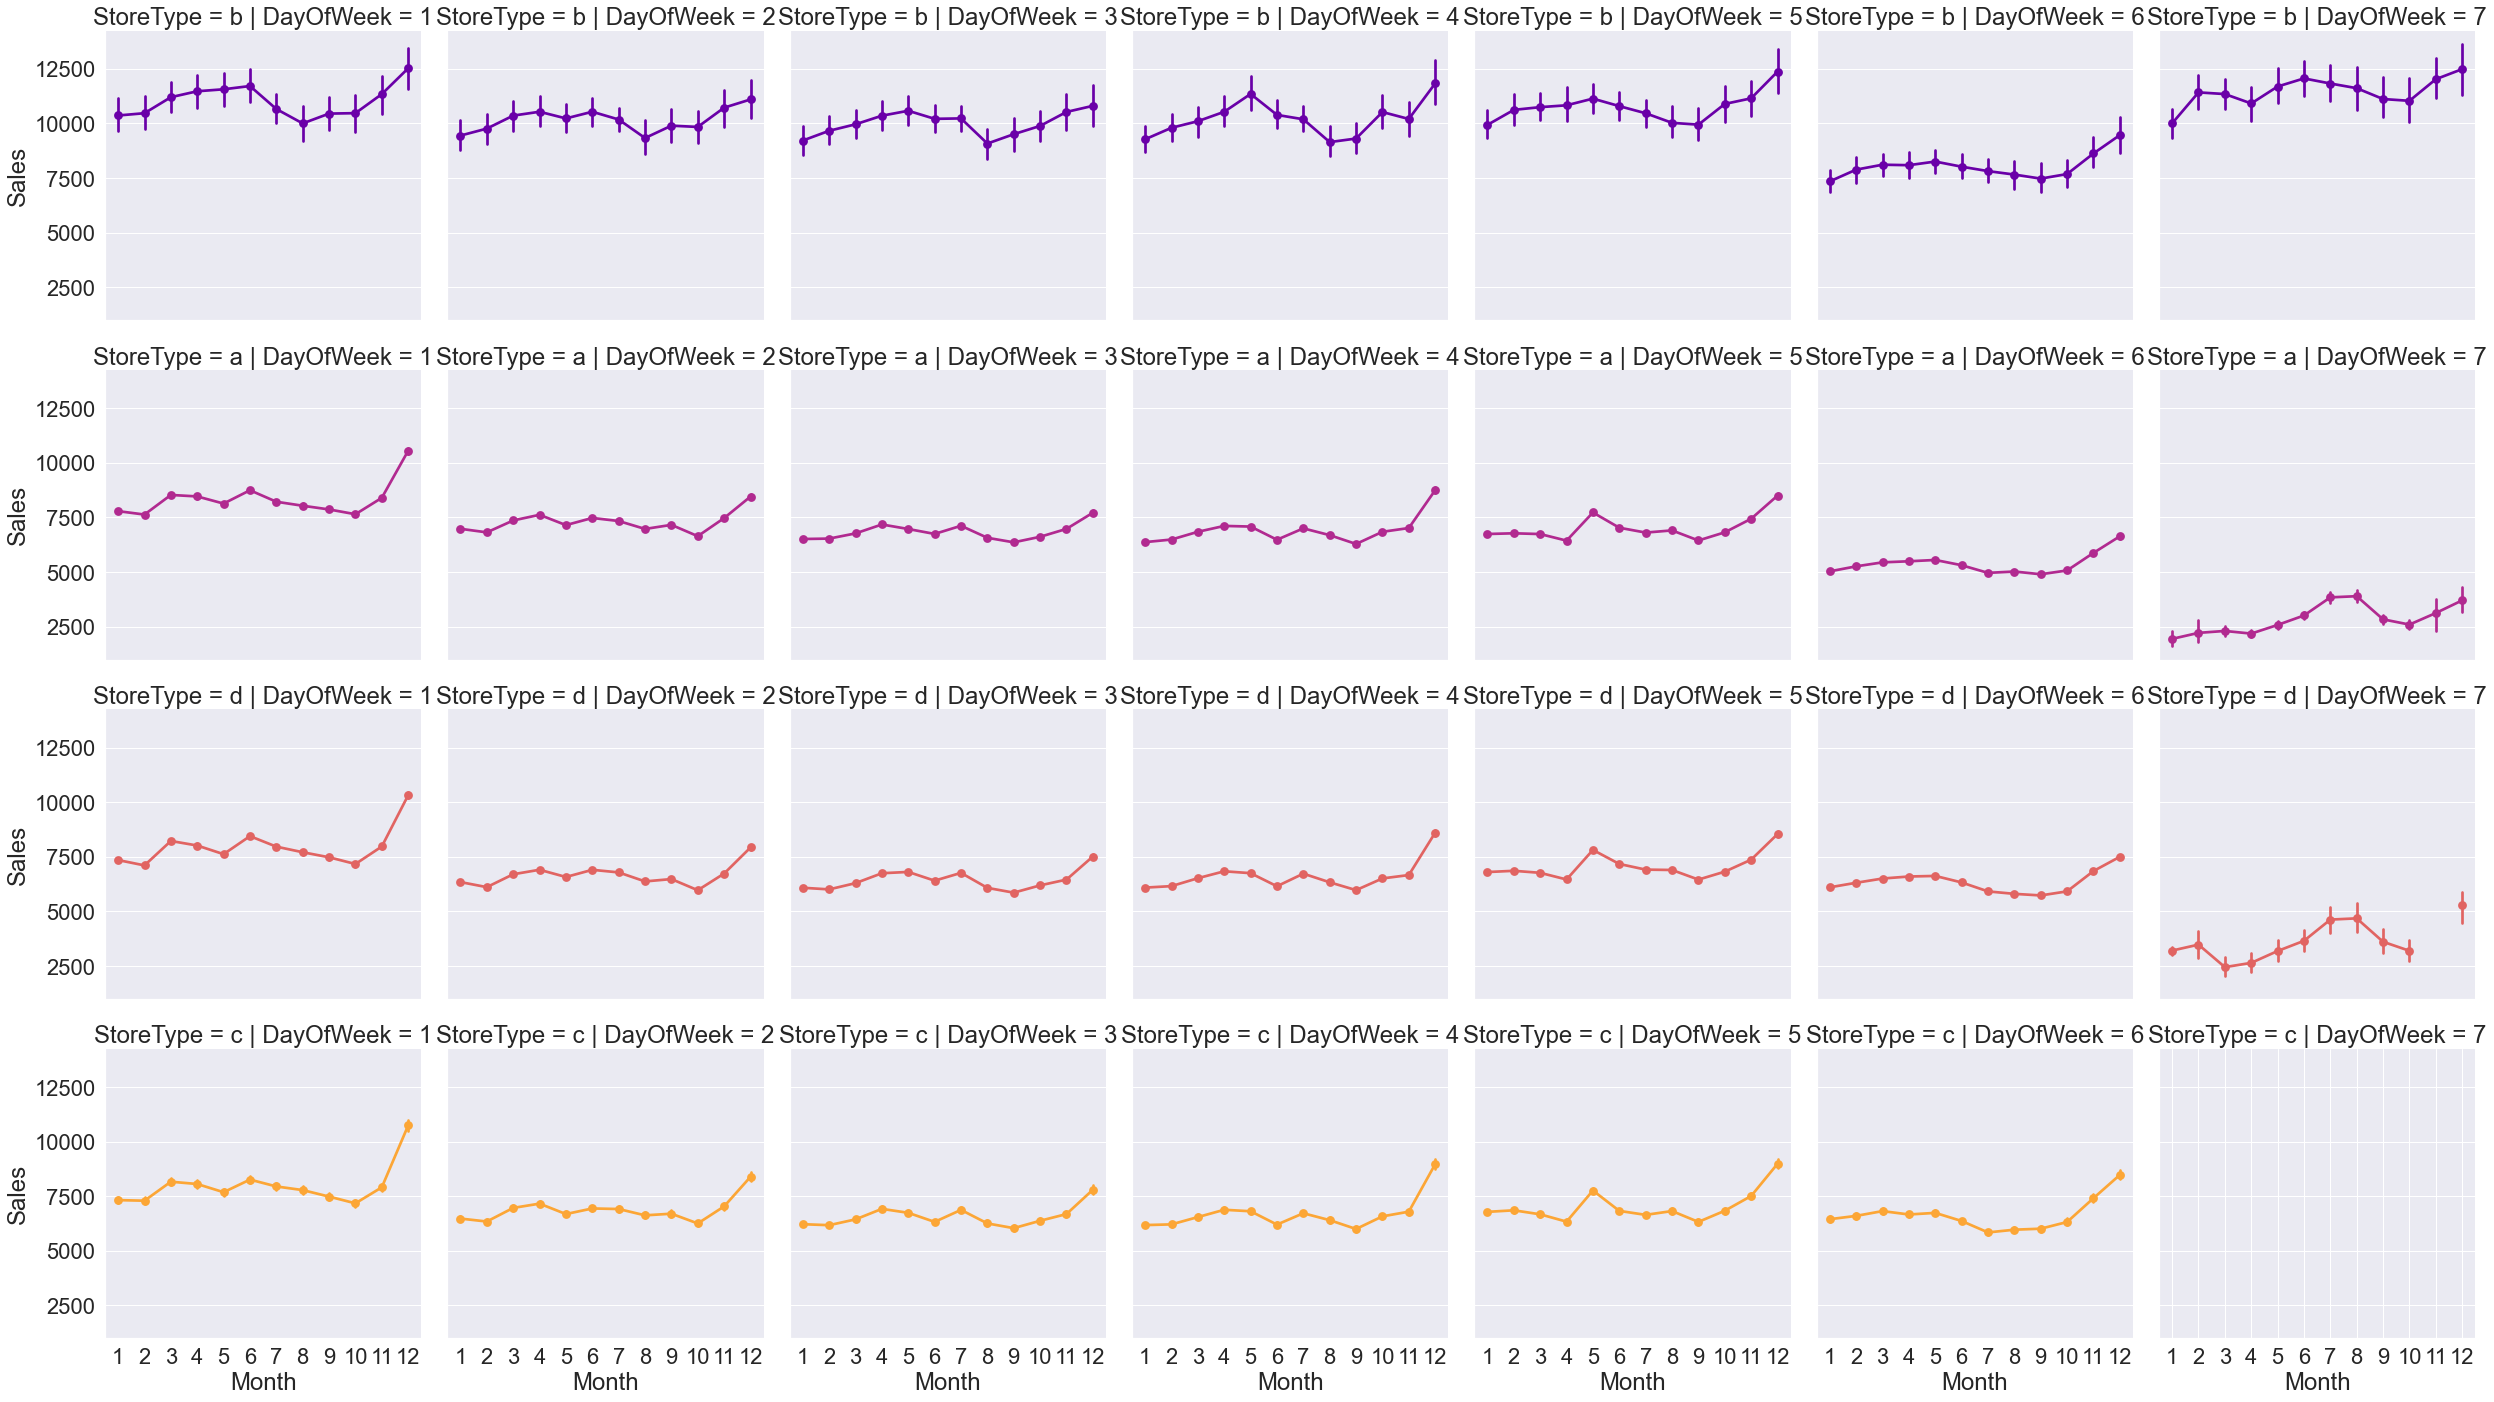

In [41]:
sns.set(font_scale=2)
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType' # per store type in rows
) 

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Count'>

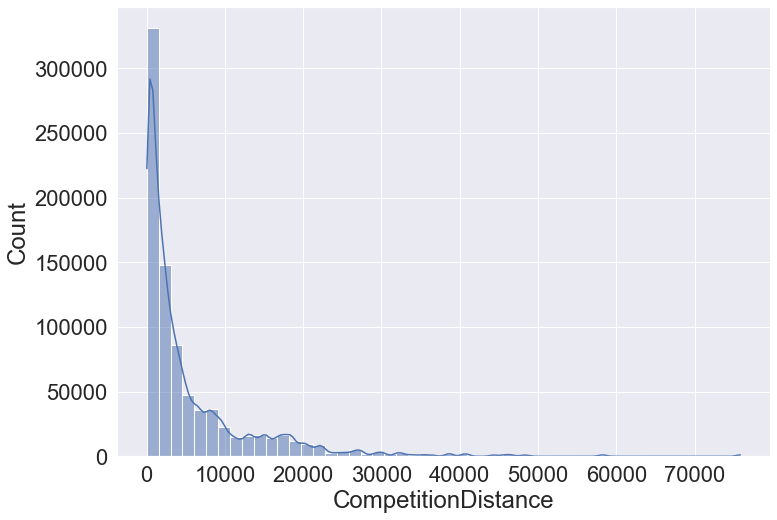

In [42]:
sns.histplot( x='CompetitionDistance', data = train_store, bins = 50, kde = True)

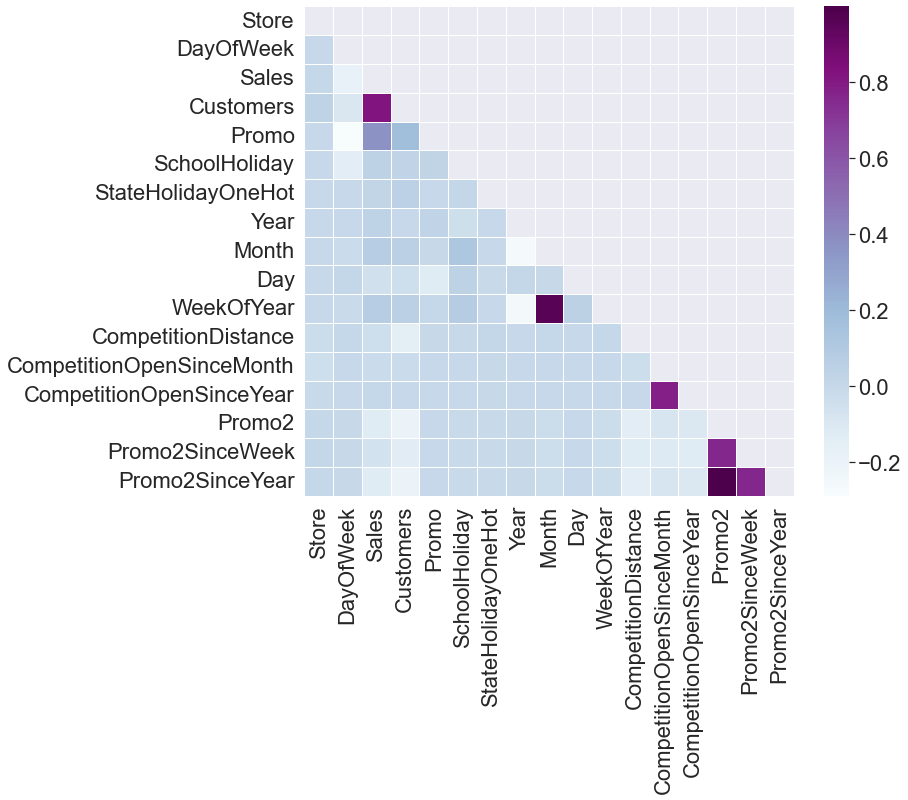

In [43]:
corr_all = train_store.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

In [44]:
train_store.head(1000)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StateHolidayOneHot,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,353,2,2013-01-01,3139,820,0,a,1,1,2013,...,1,b,b,900.0,0.0,0.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
1,353,3,2013-01-02,2686,835,0,0,1,0,2013,...,1,b,b,900.0,0.0,0.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
2,353,4,2013-01-03,2628,815,0,0,1,0,2013,...,1,b,b,900.0,0.0,0.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
3,353,5,2013-01-04,2677,856,0,0,1,0,2013,...,1,b,b,900.0,0.0,0.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
4,353,6,2013-01-05,2224,719,0,0,0,0,2013,...,1,b,b,900.0,0.0,0.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,733,4,2013-03-07,14201,3351,1,0,0,0,2013,...,10,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
996,733,5,2013-03-08,15254,3756,1,0,0,0,2013,...,10,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
997,733,6,2013-03-09,12019,3059,0,0,0,0,2013,...,10,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
998,733,7,2013-03-10,13748,2943,0,0,0,0,2013,...,10,b,b,860.0,10.0,1999.0,0,0.0,0.0,0


# Tree Based models

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [46]:
train_store.shape

(844338, 22)

In [47]:
#Handling categorical using ordinal encoding
a = train_store['Assortment'].unique()
enc_assortment = OrdinalEncoder(categories = [a])
train_store['Assortment'] = enc_assortment.fit_transform(train_store['Assortment'].to_numpy().reshape(-1,1))

In [48]:
#Standardise
scaling_columns = ['Customer', 'CompetitionDistance']
ss = StandardScaler()
train_store[['Customers', 'CompetitionDistance']] = ss.fit_transform(train_store[[ 'Customers', 'CompetitionDistance']])

In [49]:
#One hot encoding
train_store = pd.get_dummies(train_store, columns=['StoreType'])

In [50]:
train_store['Promo2SinceYear'] = train_store['Promo2SinceYear'].astype(int)
train_store['Promo2SinceWeek'] = train_store['Promo2SinceWeek'].astype(int)
train_store['Assortment'] = train_store['Assortment'].astype(int)
train_store['CompetitionDistance'] = train_store['CompetitionDistance'].astype(int)
train_store['WeekOfYear'] = train_store['WeekOfYear'].astype(int)

In [51]:
#train_store.drop('Date', axis = 1, inplace = True)

In [52]:
train_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StateHolidayOneHot', 'Year', 'Month',
       'Day', 'WeekOfYear', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d'],
      dtype='object')

In [53]:
train_store.drop(['Date',  'PromoInterval', 'StateHoliday'], inplace = True, axis = 1)

In [54]:
train_store_Y = train_store['Sales']
train_store_X = train_store.drop(columns = ['Sales'])

In [55]:
X_dev = train_store_X[0:len(train_store_X)-30]
X_test = train_store_X[len(train_store_X)-30:len(train_store_X)]
y_dev = train_store_Y[0:len(train_store_Y)-30]
y_test = train_store_Y[len(train_store_Y)-30:len(train_store_Y)]

In [56]:
#Add grid

In [65]:
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 5)]
max_depth = [int(x) for x in np.linspace(3, 20, num = 5)]

In [66]:
grid = {'n_estimators': n_estimators,
        'max_depth': max_depth}
print(grid)

{'n_estimators': [5, 28, 52, 76, 100], 'max_depth': [3, 7, 11, 15, 20]}


In [67]:
import itertools
keys, values = zip(*grid.items())
permutations_dicts = [dict(zip(keys, v)) for v in itertools.product(*values)]

In [68]:
import math
from sklearn.metrics import mean_absolute_error  #squared=False
error = math.inf
for p in permutations_dicts:
    print('n_estimators:', p['n_estimators'])
    print('max_depth:', p['max_depth'])
    rfc = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=p['n_estimators'], max_depth=p['max_depth'])
    rfc.fit(X_dev,y_dev)
    y_test_rf_pred = rfc.predict(X_test)
    y_train_rf_pred = rfc.predict(X_dev)
    if mean_absolute_error(y_test_rf_pred,y_test) <= error:
        best_params = []
        error = mean_absolute_error(y_test_rf_pred,y_test)
        best_params.append(p)
        #print(best_params)

n_estimators: 5
max_depth: 3
n_estimators: 5
max_depth: 7
n_estimators: 5
max_depth: 11
n_estimators: 5
max_depth: 15
n_estimators: 5
max_depth: 20
n_estimators: 28
max_depth: 3
n_estimators: 28
max_depth: 7
n_estimators: 28
max_depth: 11
n_estimators: 28
max_depth: 15
n_estimators: 28
max_depth: 20
n_estimators: 52
max_depth: 3
n_estimators: 52
max_depth: 7
n_estimators: 52
max_depth: 11
n_estimators: 52
max_depth: 15
n_estimators: 52
max_depth: 20
n_estimators: 76
max_depth: 3
n_estimators: 76
max_depth: 7
n_estimators: 76
max_depth: 11
n_estimators: 76
max_depth: 15
n_estimators: 76
max_depth: 20
n_estimators: 100
max_depth: 3
n_estimators: 100
max_depth: 7
n_estimators: 100
max_depth: 11
n_estimators: 100
max_depth: 15
n_estimators: 100
max_depth: 20


In [69]:
print(best_params)

[{'n_estimators': 100, 'max_depth': 20}]


### Training on best params

In [70]:
rfc = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=best_params[0]['n_estimators'], max_depth=best_params[0]['max_depth'])
rfc.fit(X_dev,y_dev)

RandomForestRegressor(max_depth=20, n_jobs=-1, random_state=42)

In [71]:
y_test_rf_pred = rfc.predict(X_test)
y_train_rf_pred = rfc.predict(X_dev)

In [72]:
from sklearn import metrics
print("Error on test",metrics.mean_absolute_error(y_test_rf_pred,y_test))

Error on test 200.10672510336013


In [73]:
print('Actual Total Sales for the next 30 days:', sum(y_test))
print('Predicted Total Sales for the next 30 days:', round(sum(y_test_rf_pred),2))

Actual Total Sales for the next 30 days: 145423
Predicted Total Sales for the next 30 days: 143653.18


In [74]:
print('Actual Total Sales for the next 30 days:', sum(y_test))
print('Predicted Total Sales for the next 30 days:', round(sum(y_test_rf_pred),2))
print('Difference betwen actual total sales and predicted total sales:', sum(y_test) -  round(sum(y_test_rf_pred),2))

Actual Total Sales for the next 30 days: 145423
Predicted Total Sales for the next 30 days: 143653.18
Difference betwen actual total sales and predicted total sales: 1769.820000000007


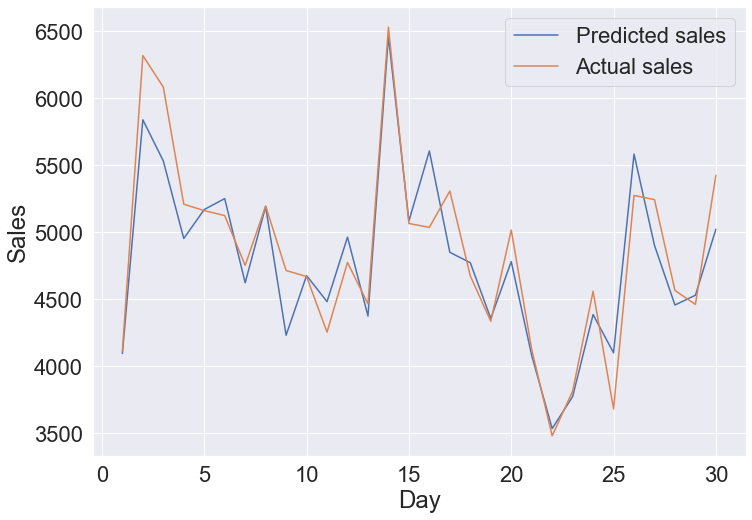

In [75]:
x = [i for i in range(1,31,1)]
plt.plot(x, y_test_rf_pred, label = 'Predicted sales')
plt.plot(x, y_test, label = 'Actual sales')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend()
plt.show()

# XGBoost

Try prameter tuning

In [76]:
from xgboost import XGBRegressor

In [77]:
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 5)]
max_depth = [int(x) for x in np.linspace(3, 20, num = 5)]

In [78]:
grid = {'n_estimators': n_estimators,
        'max_depth': max_depth}
print(grid)

{'n_estimators': [5, 28, 52, 76, 100], 'max_depth': [3, 7, 11, 15, 20]}


In [79]:
import itertools
keys, values = zip(*grid.items())
permutations_dicts = [dict(zip(keys, v)) for v in itertools.product(*values)]

In [81]:
import math
from sklearn.metrics import mean_absolute_error  #squared=False
error = math.inf
for p in permutations_dicts:
    print('n_estimators:', p['n_estimators'])
    print('max_depth:', p['max_depth'])
    xgboost = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=p['n_estimators'], max_depth=p['max_depth'])
    xgboost.fit(X_dev,y_dev)
    y_test_rf_pred = xgboost.predict(X_test)
    y_train_rf_pred = xgboost.predict(X_dev)
    if metrics.mean_absolute_error(y_test_rf_pred,y_test) <= error:
        best_params = []
        error = metrics.mean_absolute_error(y_test_rf_pred,y_test)
        best_params.append(p)
        #print(best_params)

n_estimators: 5
max_depth: 3
n_estimators: 5
max_depth: 7
n_estimators: 5
max_depth: 11
n_estimators: 5
max_depth: 15
n_estimators: 5
max_depth: 20
n_estimators: 28
max_depth: 3
n_estimators: 28
max_depth: 7
n_estimators: 28
max_depth: 11
n_estimators: 28
max_depth: 15
n_estimators: 28
max_depth: 20
n_estimators: 52
max_depth: 3
n_estimators: 52
max_depth: 7
n_estimators: 52
max_depth: 11
n_estimators: 52
max_depth: 15
n_estimators: 52
max_depth: 20
n_estimators: 76
max_depth: 3
n_estimators: 76
max_depth: 7
n_estimators: 76
max_depth: 11
n_estimators: 76
max_depth: 15
n_estimators: 76
max_depth: 20
n_estimators: 100
max_depth: 3
n_estimators: 100
max_depth: 7
n_estimators: 100
max_depth: 11
n_estimators: 100
max_depth: 15
n_estimators: 100
max_depth: 20


In [82]:
print(best_params)

[{'n_estimators': 28, 'max_depth': 15}]


### Training on best params

In [83]:
xgboost = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=best_params[0]['n_estimators'], max_depth=best_params[0]['max_depth'])
xgboost.fit(X_dev,y_dev)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=28, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
y_test_rf_pred = xgboost.predict(X_test)
y_train_rf_pred = xgboost.predict(X_dev)

In [85]:
from sklearn import metrics
print("Error on test",metrics.mean_absolute_error(y_test_rf_pred,y_test))

Error on test 197.57066243489584


In [86]:
print('Actual Total Sales for the next 30 days:', sum(y_test))
print('Predicted Total Sales for the next 30 days:', round(sum(y_test_rf_pred),2))

Actual Total Sales for the next 30 days: 145423
Predicted Total Sales for the next 30 days: 145752.02


In [87]:
print('Difference betwen actual total sales and predicted total sales:', sum(y_test) -  round(sum(y_test_rf_pred),2))

Difference betwen actual total sales and predicted total sales: -329.0199999999895


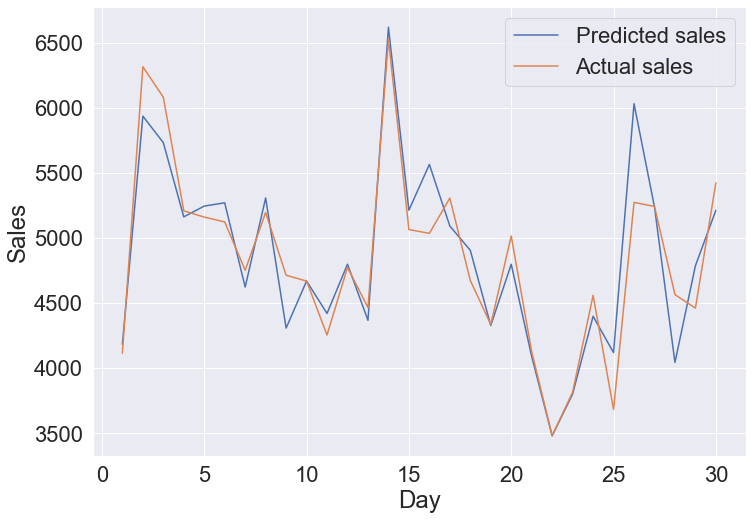

In [88]:
x = [i for i in range(1,31,1)]
plt.plot(x, y_test_rf_pred, label = 'Predicted sales')
plt.plot(x, y_test, label = 'Actual sales')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend()
plt.show()

# ARIMA

In [7]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

In [8]:
train_store_arima = train_store[:]

In [9]:
# split the data to training set and test set
df = train_store_arima[train_store_arima['Date'] < '2015-07-01']
df_test = train_store_arima[train_store_arima['Date'] >= '2015-07-01']

In [92]:
store_distance_low = df.loc[df['CompetitionDistance'] <= 2000]
print(store_distance_low.shape)
store_distance_mid = df.loc[(df['CompetitionDistance'] > 2000) & (df['CompetitionDistance'] <= 12000)]
print(store_distance_mid.shape)
store_distance_large = df.loc[df['CompetitionDistance'] > 12000]
print(store_distance_large.shape)

(367171, 22)
(328249, 22)
(118730, 22)


In [93]:
print('A')
store_A_distance_low = df.loc[(df['CompetitionDistance'] <= 2000) & (df['StoreType'] == 'a')]
print(store_A_distance_low.shape)
store_A_distance_mid = df.loc[(df['CompetitionDistance'] > 2000) & (df['CompetitionDistance'] <= 12000) & (df['StoreType'] == 'a')]
print(store_A_distance_mid.shape)
store_A_distance_large = df.loc[(df['CompetitionDistance'] > 12000) & (df['StoreType'] == 'a')]
print(store_A_distance_large.shape)
print('b')
store_B_distance_low = df.loc[(df['CompetitionDistance'] <= 2000) & (df['StoreType'] == 'b')]
print(store_B_distance_low.shape)
store_B_distance_mid = df.loc[(df['CompetitionDistance'] > 2000) & (df['CompetitionDistance'] <= 12000) & (df['StoreType'] == 'b')]
print(store_B_distance_mid.shape)
store_B_distance_large = df.loc[(df['CompetitionDistance'] > 12000) & (df['StoreType'] == 'b')]
print(store_B_distance_large.shape)
print('c')
store_C_distance_low = df.loc[(df['CompetitionDistance'] <= 2000) & (df['StoreType'] == 'c')]
print(store_C_distance_low.shape)
store_C_distance_mid = df.loc[(df['CompetitionDistance'] > 2000) & (df['CompetitionDistance'] <= 12000) & (df['StoreType'] == 'c')]
print(store_C_distance_mid.shape)
store_C_distance_large = df.loc[(df['CompetitionDistance'] > 12000) & (df['StoreType'] == 'c')]
print(store_C_distance_large.shape)
print('d')
store_D_distance_low = df.loc[(df['CompetitionDistance'] <= 2000) & (df['StoreType'] == 'd')]
print(store_D_distance_low.shape)
store_D_distance_mid = df.loc[(df['CompetitionDistance'] > 2000) & (df['CompetitionDistance'] <= 12000) & (df['StoreType'] == 'd')]
print(store_D_distance_mid.shape)
store_D_distance_large = df.loc[(df['CompetitionDistance'] > 12000) & (df['StoreType'] == 'd')]
print(store_D_distance_large.shape)

A
(228048, 22)
(144803, 22)
(67934, 22)
b
(14132, 22)
(901, 22)
(0, 22)
c
(59862, 22)
(43252, 22)
(5858, 22)
d
(65129, 22)
(139293, 22)
(44938, 22)


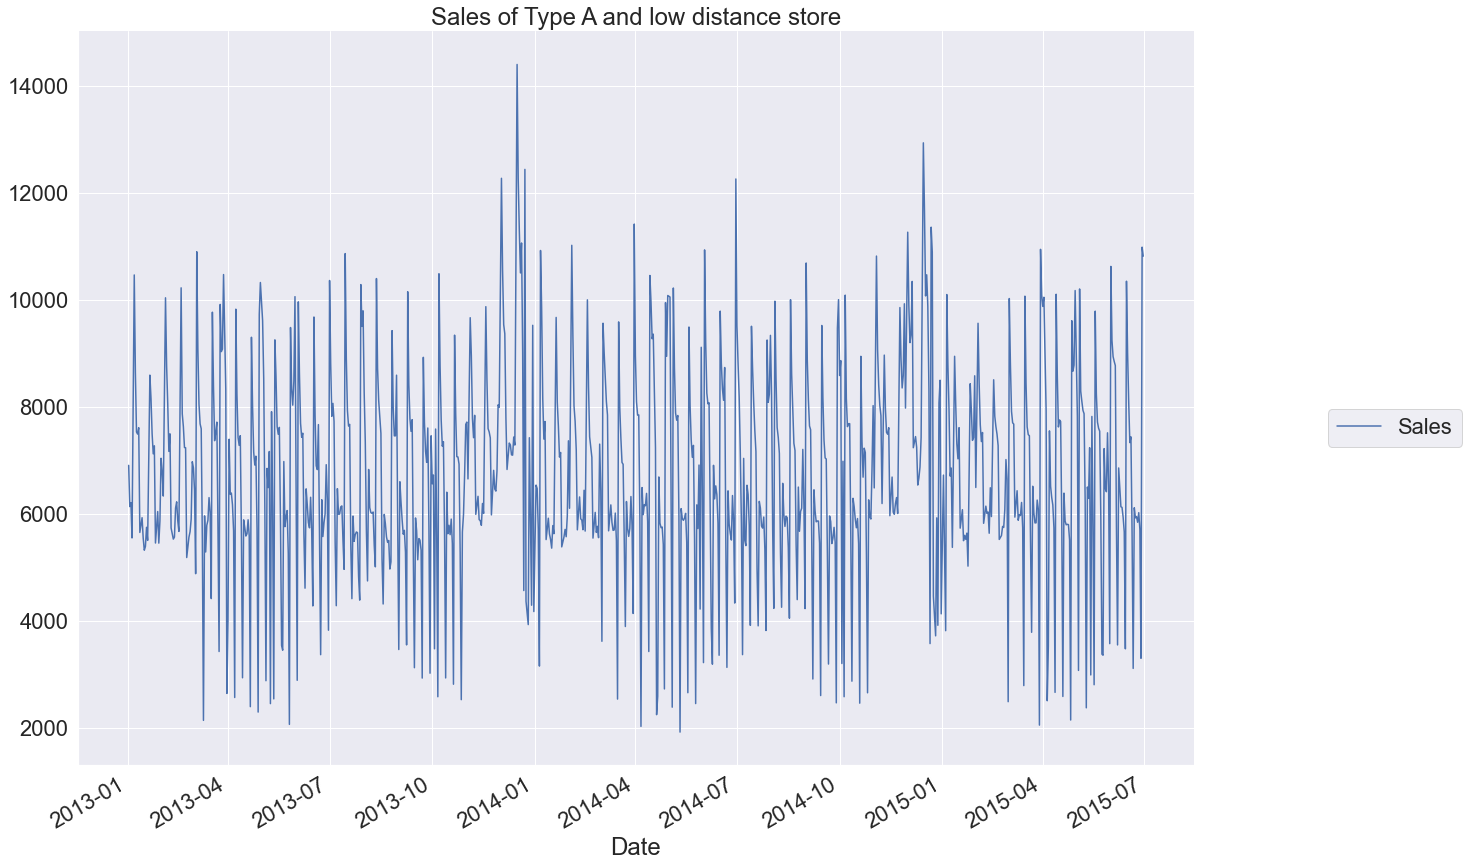

In [94]:
# for stores with type A and low distance:
store_A_distance_low_sales = pd.DataFrame(store_A_distance_low, columns = ['Date', 'Sales']).iloc[::-1]
store_A_distance_low_sales['Date'] = pd.to_datetime(store_A_distance_low_sales['Date'])
store_A_distance_low_sales_new = store_A_distance_low_sales.groupby(by = 'Date').mean()
store_A_distance_low_sales_new.plot(figsize=(20,15))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Sales of Type A and low distance store")
sns.despine()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

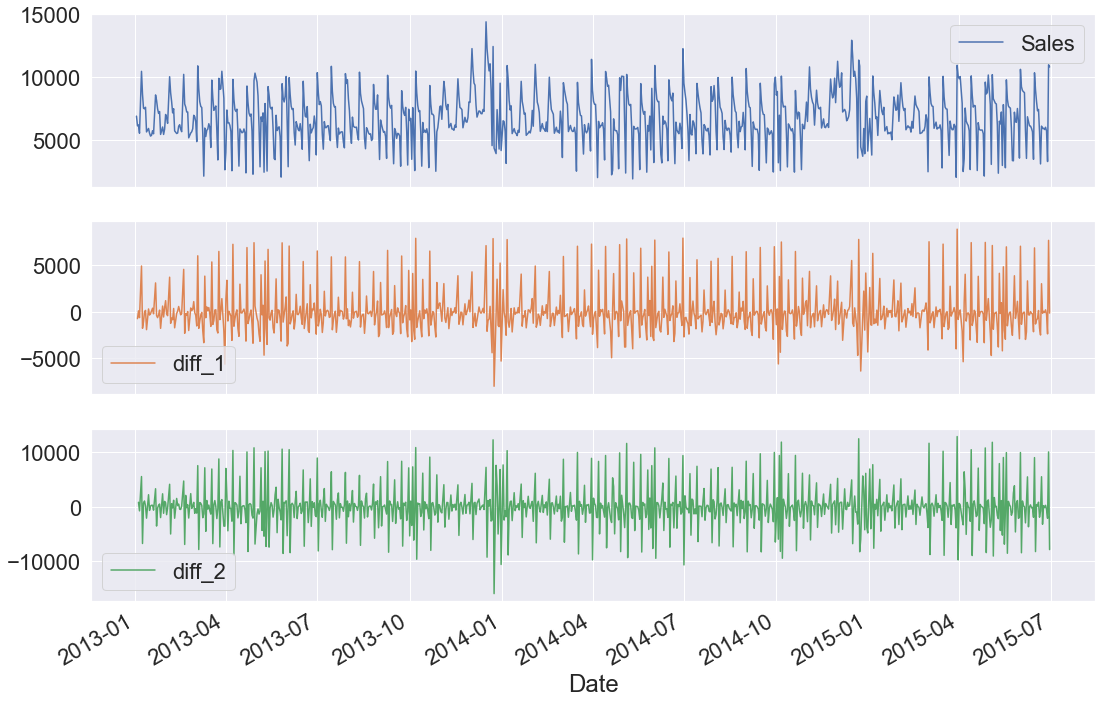

In [95]:
store_A_distance_low_sales_new['diff_1'] = store_A_distance_low_sales_new['Sales'].diff(1)
store_A_distance_low_sales_new['diff_2'] = store_A_distance_low_sales_new['diff_1'].diff(1)
store_A_distance_low_sales_new.plot(subplots=True, figsize=(18, 12))

In [96]:
del store_A_distance_low_sales_new['diff_1']
del store_A_distance_low_sales_new['diff_2']
store_A_distance_low_sales_new

,Sales
Date,
2013-01-02,6904.629393
2013-01-03,6134.127796
2013-01-04,6207.623003
2013-01-05,5548.290735
2013-01-07,10462.823718
...,...
2015-06-26,6020.610224
2015-06-27,5711.552716
2015-06-28,3299.500000


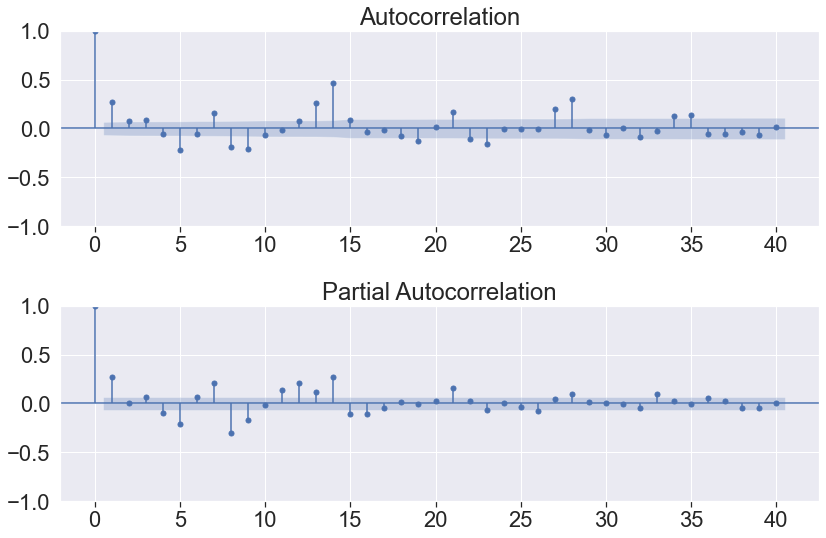

In [97]:
fig = plt.figure(figsize = (12,8))
#acf
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_A_distance_low_sales_new, lags = 40, ax = ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout();
#pacf
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_A_distance_low_sales_new, lags = 40, ax = ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout();

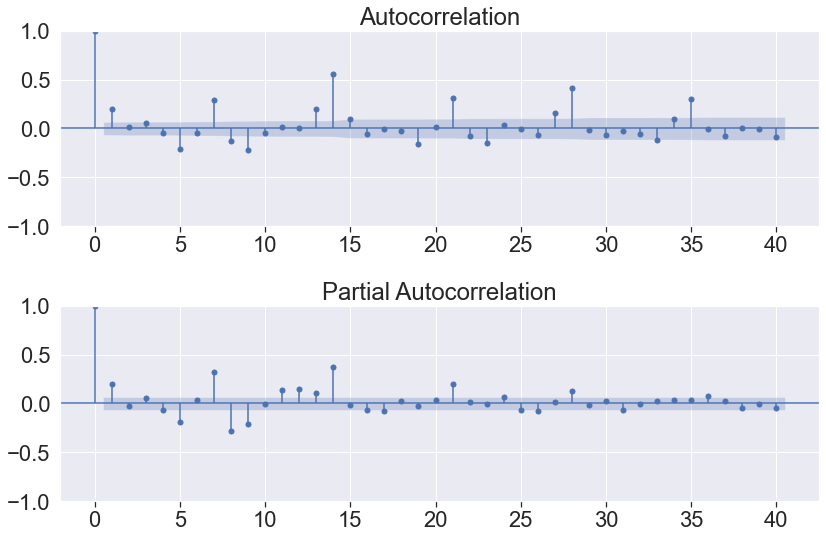

In [98]:
# for stores with type A and mid distance:
store_A_distance_mid_sales = pd.DataFrame(store_A_distance_mid, columns = ['Date', 'Sales']).iloc[::-1]
store_A_distance_mid_sales['Date'] = pd.to_datetime(store_A_distance_mid_sales['Date'])
store_A_distance_mid_sales_new = store_A_distance_mid_sales.groupby(by = 'Date').mean()

fig = plt.figure(figsize = (12,8))
#acf
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_A_distance_mid_sales_new, lags = 40, ax = ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout();
#pacf
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_A_distance_mid_sales_new, lags = 40, ax = ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout();

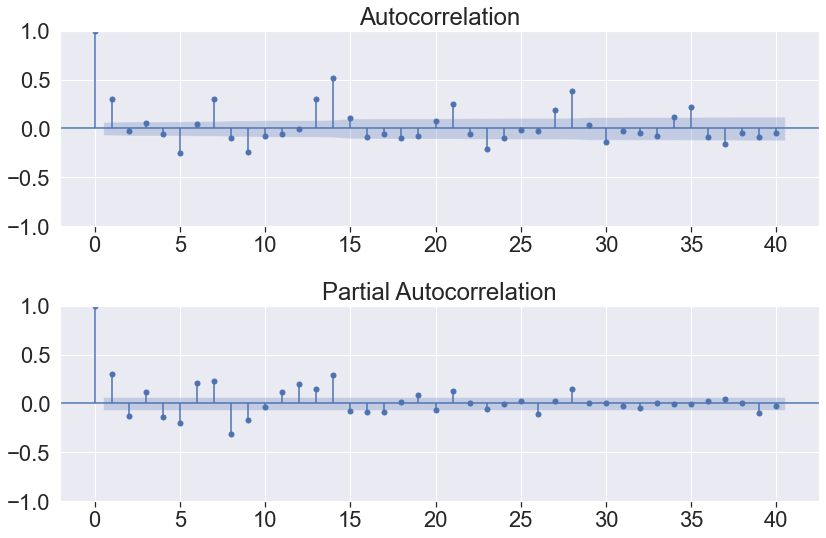

In [99]:
store_A_distance_large_sales = pd.DataFrame(store_A_distance_large, columns = ['Date', 'Sales']).iloc[::-1]
store_A_distance_large_sales['Date'] = pd.to_datetime(store_A_distance_large_sales['Date'])
store_A_distance_large_sales_new = store_A_distance_large_sales.groupby(by = 'Date').mean()

fig = plt.figure(figsize = (12,8))
#acf
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_A_distance_large_sales_new, lags = 40, ax = ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout();
#pacf
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_A_distance_large_sales_new, lags = 40, ax = ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout();

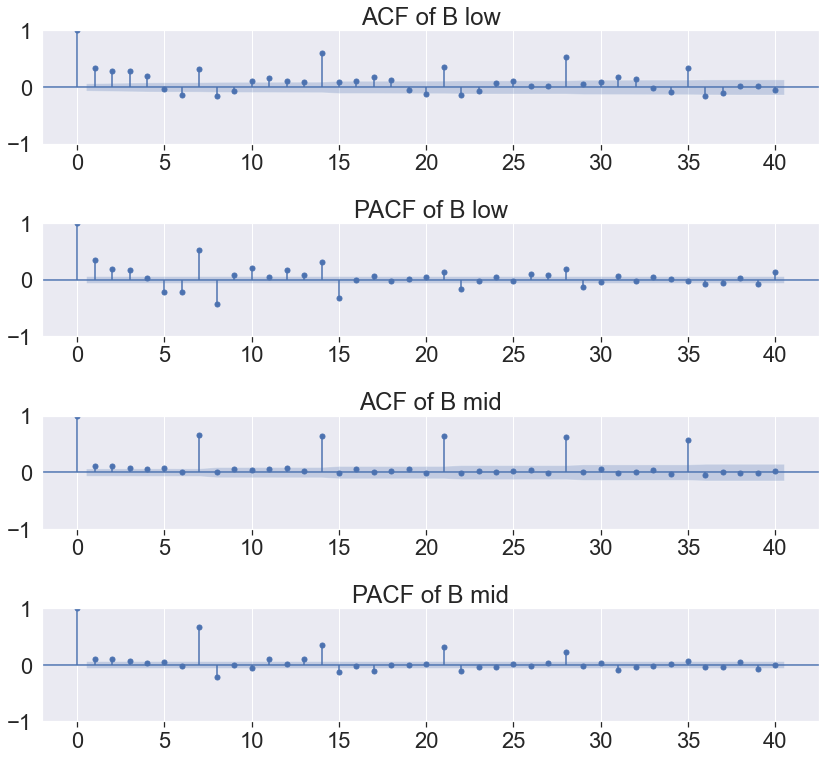

In [100]:
store_B_distance_low_sales = pd.DataFrame(store_B_distance_low, columns = ['Date', 'Sales']).iloc[::-1]
store_B_distance_low_sales['Date'] = pd.to_datetime(store_B_distance_low_sales['Date'])
store_B_distance_low_sales_new = store_B_distance_low_sales.groupby(by = 'Date').mean()

store_B_distance_mid_sales = pd.DataFrame(store_B_distance_mid, columns = ['Date', 'Sales']).iloc[::-1]
store_B_distance_mid_sales['Date'] = pd.to_datetime(store_B_distance_mid_sales['Date'])
store_B_distance_mid_sales_new = store_B_distance_mid_sales.groupby(by = 'Date').mean()

store_B_distance_large_sales = pd.DataFrame(store_B_distance_large, columns = ['Date', 'Sales']).iloc[::-1]
store_B_distance_large_sales['Date'] = pd.to_datetime(store_B_distance_large_sales['Date'])
store_B_distance_large_sales_new = store_B_distance_large_sales.groupby(by = 'Date').mean()

fig = plt.figure(figsize = (12,16))
#acf
ax1 = fig.add_subplot(611)
fig = sm.graphics.tsa.plot_acf(store_B_distance_low_sales_new, lags = 40, ax = ax1)
ax1.xaxis.set_ticks_position('bottom')
ax1.set_title('ACF of B low')
fig.tight_layout();
#pacf
ax2 = fig.add_subplot(612)
fig = sm.graphics.tsa.plot_pacf(store_B_distance_low_sales_new, lags = 40, ax = ax2)
ax2.xaxis.set_ticks_position('bottom')
ax2.set_title('PACF of B low')
fig.tight_layout();
#acf
ax3 = fig.add_subplot(613)
fig = sm.graphics.tsa.plot_acf(store_B_distance_mid_sales_new, lags = 40, ax = ax3)
ax3.xaxis.set_ticks_position('bottom')
ax3.set_title('ACF of B mid')
fig.tight_layout();
#pacf
ax4 = fig.add_subplot(614)
fig = sm.graphics.tsa.plot_pacf(store_B_distance_mid_sales_new, lags = 40, ax = ax4)
ax4.xaxis.set_ticks_position('bottom')
ax4.set_title('PACF of B mid')
fig.tight_layout();

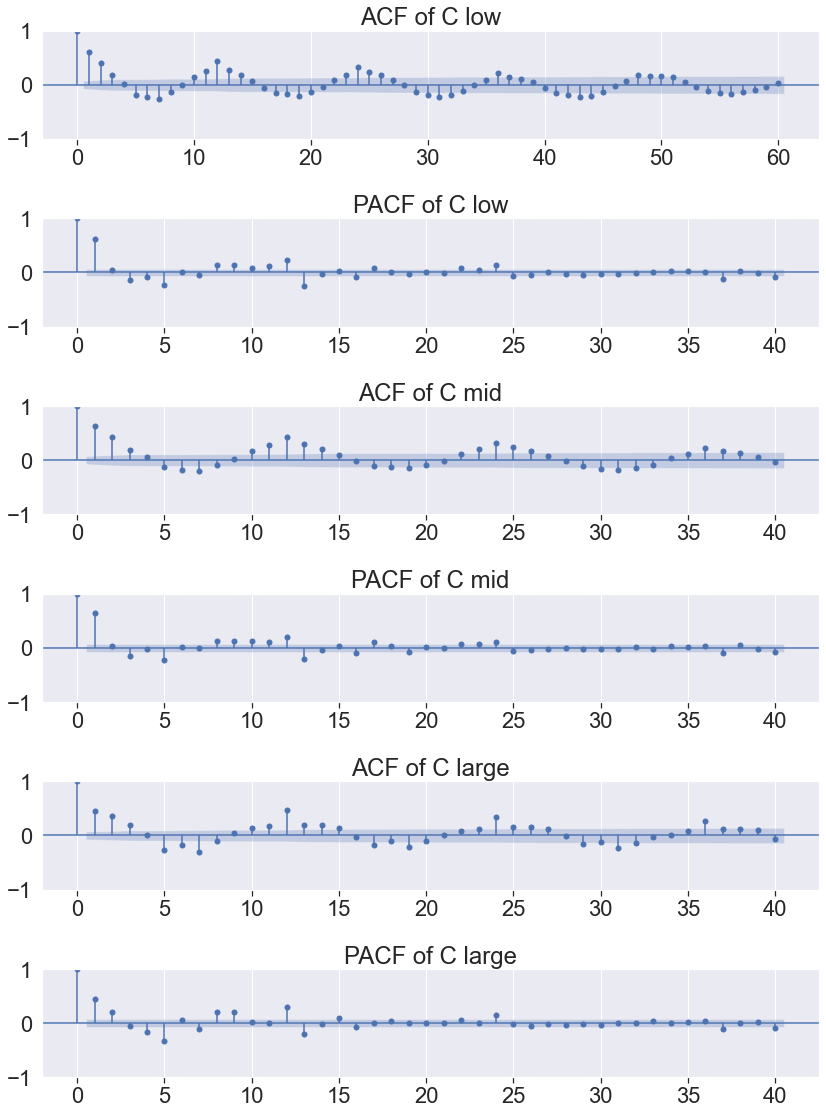

In [101]:
# for stores with type C:
store_C_distance_low_sales = pd.DataFrame(store_C_distance_low, columns = ['Date', 'Sales']).iloc[::-1]
store_C_distance_low_sales['Date'] = pd.to_datetime(store_C_distance_low_sales['Date'])
store_C_distance_low_sales_new = store_C_distance_low_sales.groupby(by = 'Date').mean()

store_C_distance_mid_sales = pd.DataFrame(store_C_distance_mid, columns = ['Date', 'Sales']).iloc[::-1]
store_C_distance_mid_sales['Date'] = pd.to_datetime(store_C_distance_mid_sales['Date'])
store_C_distance_mid_sales_new = store_C_distance_mid_sales.groupby(by = 'Date').mean()

store_C_distance_large_sales = pd.DataFrame(store_C_distance_large, columns = ['Date', 'Sales']).iloc[::-1]
store_C_distance_large_sales['Date'] = pd.to_datetime(store_C_distance_large_sales['Date'])
store_C_distance_large_sales_new = store_C_distance_large_sales.groupby(by = 'Date').mean()

fig = plt.figure(figsize = (12,16))
#acf
ax1 = fig.add_subplot(611)
fig = sm.graphics.tsa.plot_acf(store_C_distance_low_sales_new, lags = 60, ax = ax1)
ax1.xaxis.set_ticks_position('bottom')
ax1.set_title('ACF of C low')
fig.tight_layout();
#pacf
ax2 = fig.add_subplot(612)
fig = sm.graphics.tsa.plot_pacf(store_C_distance_low_sales_new, lags = 40, ax = ax2)
ax2.xaxis.set_ticks_position('bottom')
ax2.set_title('PACF of C low')
fig.tight_layout();
#acf
ax3 = fig.add_subplot(613)
fig = sm.graphics.tsa.plot_acf(store_C_distance_mid_sales_new, lags = 40, ax = ax3)
ax3.xaxis.set_ticks_position('bottom')
ax3.set_title('ACF of C mid')
fig.tight_layout();
#pacf
ax4 = fig.add_subplot(614)
fig = sm.graphics.tsa.plot_pacf(store_C_distance_mid_sales_new, lags = 40, ax = ax4)
ax4.xaxis.set_ticks_position('bottom')
ax4.set_title('PACF of C mid')
fig.tight_layout();
#acf
ax5 = fig.add_subplot(615)
fig = sm.graphics.tsa.plot_acf(store_C_distance_large_sales_new, lags = 40, ax = ax5)
ax5.xaxis.set_ticks_position('bottom')
ax5.set_title('ACF of C large')
fig.tight_layout();
#pacf
ax6 = fig.add_subplot(616)
fig = sm.graphics.tsa.plot_pacf(store_C_distance_large_sales_new, lags = 40, ax = ax6)
ax6.xaxis.set_ticks_position('bottom')
ax6.set_title('PACF of C large')
fig.tight_layout();

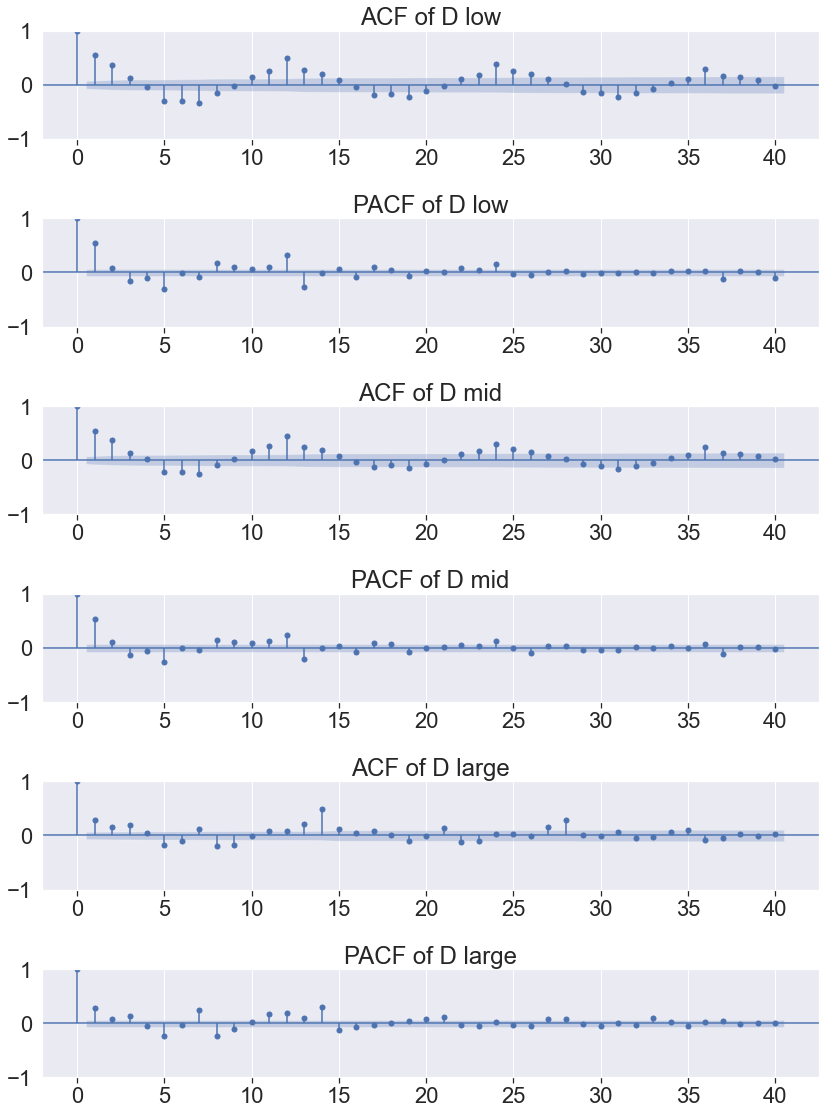

In [102]:
# for stores with type D:
store_D_distance_low_sales = pd.DataFrame(store_D_distance_low, columns = ['Date', 'Sales']).iloc[::-1]
store_D_distance_low_sales['Date'] = pd.to_datetime(store_D_distance_low_sales['Date'])
store_D_distance_low_sales_new = store_D_distance_low_sales.groupby(by = 'Date').mean()

store_D_distance_mid_sales = pd.DataFrame(store_D_distance_mid, columns = ['Date', 'Sales']).iloc[::-1]
store_D_distance_mid_sales['Date'] = pd.to_datetime(store_D_distance_mid_sales['Date'])
store_D_distance_mid_sales_new = store_D_distance_mid_sales.groupby(by = 'Date').mean()

store_D_distance_large_sales = pd.DataFrame(store_D_distance_large, columns = ['Date', 'Sales']).iloc[::-1]
store_D_distance_large_sales['Date'] = pd.to_datetime(store_D_distance_large_sales['Date'])
store_D_distance_large_sales_new = store_D_distance_large_sales.groupby(by = 'Date').mean()

fig = plt.figure(figsize = (12,16))
#acf
ax1 = fig.add_subplot(611)
fig = sm.graphics.tsa.plot_acf(store_D_distance_low_sales_new, lags = 40, ax = ax1)
ax1.xaxis.set_ticks_position('bottom')
ax1.set_title('ACF of D low')
fig.tight_layout();
#pacf
ax2 = fig.add_subplot(612)
fig = sm.graphics.tsa.plot_pacf(store_D_distance_low_sales_new, lags = 40, ax = ax2)
ax2.xaxis.set_ticks_position('bottom')
ax2.set_title('PACF of D low')
fig.tight_layout();
#acf
ax3 = fig.add_subplot(613)
fig = sm.graphics.tsa.plot_acf(store_D_distance_mid_sales_new, lags = 40, ax = ax3)
ax3.xaxis.set_ticks_position('bottom')
ax3.set_title('ACF of D mid')
fig.tight_layout();
#pacf
ax4 = fig.add_subplot(614)
fig = sm.graphics.tsa.plot_pacf(store_D_distance_mid_sales_new, lags = 40, ax = ax4)
ax4.xaxis.set_ticks_position('bottom')
ax4.set_title('PACF of D mid')
fig.tight_layout();
#acf
ax5 = fig.add_subplot(615)
fig = sm.graphics.tsa.plot_acf(store_D_distance_large_sales_new, lags = 40, ax = ax5)
ax5.xaxis.set_ticks_position('bottom')
ax5.set_title('ACF of D large')
fig.tight_layout();
#pacf
ax6 = fig.add_subplot(616)
fig = sm.graphics.tsa.plot_pacf(store_D_distance_large_sales_new, lags = 40, ax = ax6)
ax6.xaxis.set_ticks_position('bottom')
ax6.set_title('PACF of D large')
fig.tight_layout();

In [11]:
def get_model(sales, storeType, distance):
    if storeType == 'a':
      if distance <= 2000:
        return sm.tsa.SARIMAX(sales, order=(17,1,15))
      elif distance > 12000:
        return sm.tsa.SARIMAX(sales, order=(18,1,16))
      else:
        return sm.tsa.SARIMAX(sales, order=(15,1,16))
    elif storeType == 'b':
      if distance <= 2000:
        return sm.tsa.SARIMAX(sales, order=(16,1,15))
      else:
        return sm.tsa.SARIMAX(sales, order=(6,1,13))
    elif storeType == 'c':
      if distance <= 2000:
        return sm.tsa.SARIMAX(sales, order=(14,1,33))
      elif distance > 12000:
        return sm.tsa.SARIMAX(sales, order=(14,1,20))
      else:
        return sm.tsa.SARIMAX(sales, order=(14,1,27))
    else:
      if distance <= 2000:
        return sm.tsa.SARIMAX(sales, order=(14,1,33))
      elif distance > 12000:
        return sm.tsa.SARIMAX(sales, order=(17,1,16))
      else:
        return sm.tsa.SARIMAX(sales, order=(14,1,27))

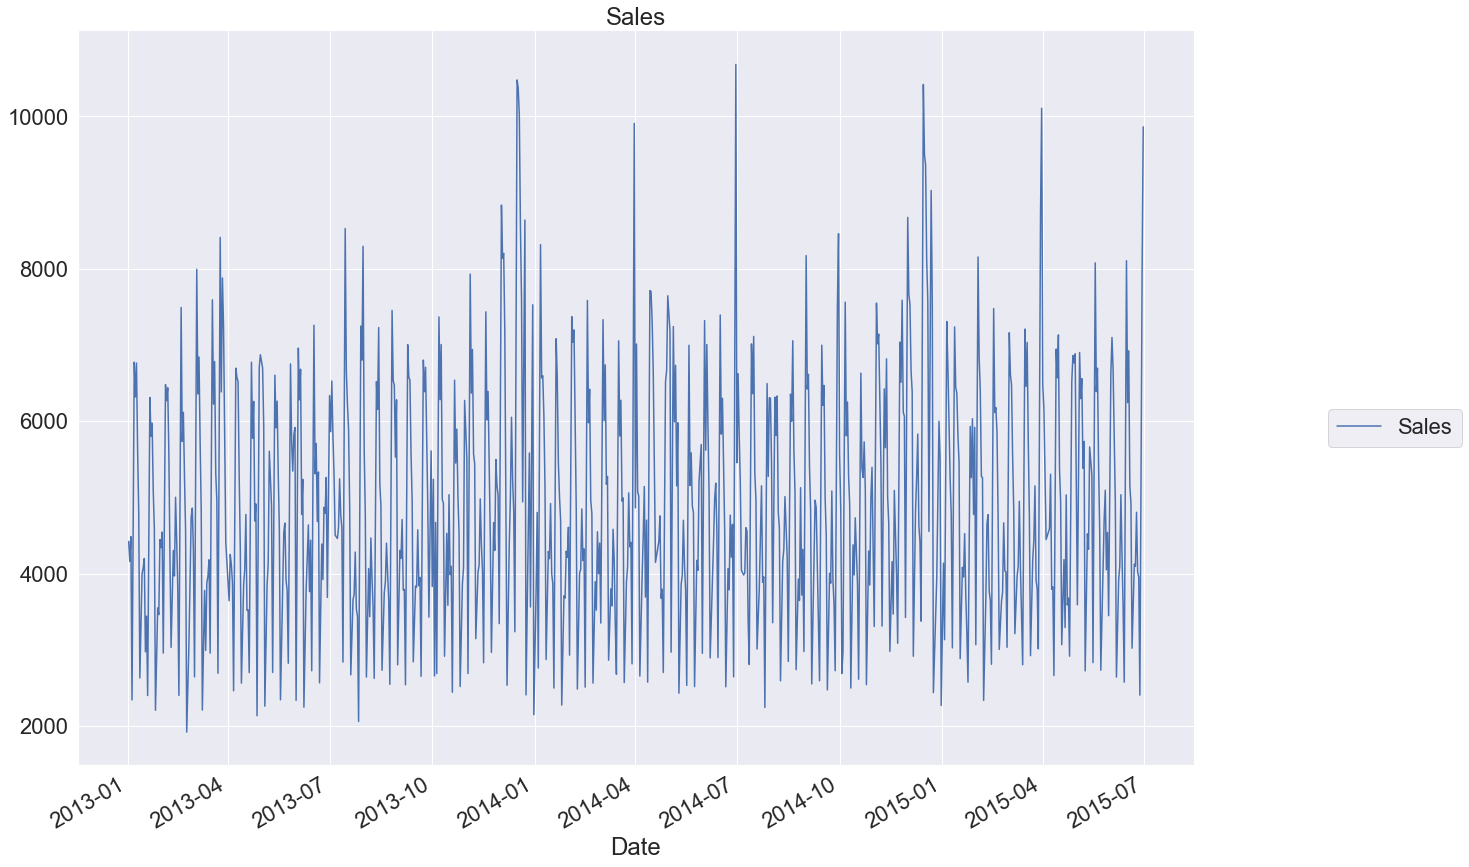

In [104]:
# store2: store type a, low distance
store_0 = df.loc[df['Store'] == 2]
store_0_test = df_test.loc[df_test['Store'] == 2]
store_0_sales = pd.DataFrame(store_0, columns = ['Date', 'Sales'])
store_0_sales['Date'] = pd.to_datetime(store_0_sales['Date'])
store_0_sales.set_index('Date', inplace = True)
store_0_sales.plot(figsize=(20,15))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Sales")
sns.despine()

In [105]:
model = get_model(store_0_sales['Sales'], store_0['StoreType'].iloc[0], store_0['CompetitionDistance'].iloc[0]) 
model_results = model.fit()
print(model_results.summary())

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  757
Model:             SARIMAX(17, 1, 15)   Log Likelihood               -6443.621
Date:                Mon, 25 Apr 2022   AIC                          12953.241
Time:                        18:18:55   BIC                          13105.967
Sample:                             0   HQIC                         13012.068
                                - 757                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5093      5.709     -0.089      0.929     -11.699      10.680
ar.L2         -0.5629      1.721     -0.327      0.744      -3.936       2.811
ar.L3         -0.7025      3.810     -0.184      0.8

In [106]:
pred = model_results.forecast(steps = 31, dynamic = True, typ = 'levels')
store_0_result = pd.DataFrame(store_0_test, columns = ['Date', 'Sales'])
store_0_pred_list = []
for i in range(len(store_0_result['Date'])):
    store_0_pred_list.append(round(pred.iloc[i]))
store_0_result.insert(2, 'Pred_Sales', store_0_pred_list, True)
store_0_result

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Date,Sales,Pred_Sales
829903,2015-07-01,6431,8095
829904,2015-07-02,6189,6202
829905,2015-07-03,4838,4918
829906,2015-07-04,4475,3643
829907,2015-07-06,4132,5096
829908,2015-07-07,4313,4797
829909,2015-07-08,5676,4293
829910,2015-07-09,4082,3458
829911,2015-07-10,4384,3423
829912,2015-07-11,2677,3446


In [107]:
# print real total sales and pred total sales
print('Actual Total Sales for the next 30 days:', store_0_result['Sales'].sum())
print('Predicted Total Sales for the next 30 days:', store_0_result['Pred_Sales'].sum())
# total sum diff
diff = store_0_result['Sales'].sum() - store_0_result['Pred_Sales'].sum()
print('Difference betwen actual total sales and predicted total sales:', diff)

Actual Total Sales for the next 30 days: 133765
Predicted Total Sales for the next 30 days: 138577
Difference betwen actual total sales and predicted total sales: -4812


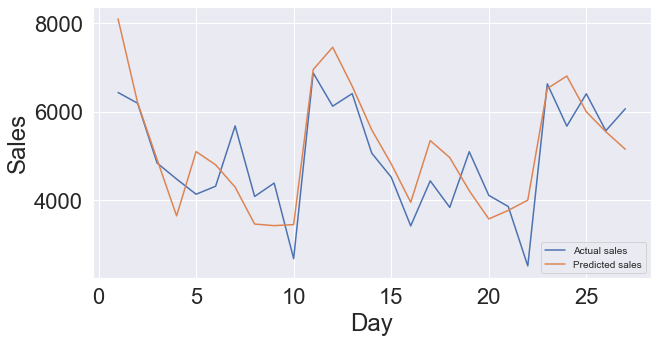

In [108]:
x = [i for i in range(1,len(store_0_result['Sales'])+1,1)]
plt.figure(figsize=(10,5))
plt.plot(x,store_0_result['Sales'], label = "Actual sales")
plt.plot(x,store_0_result['Pred_Sales'], label = "Predicted sales")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend(loc=4, prop={'size': 10})
plt.show()

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


             Date  Sales  Pred_Sales
840693 2015-07-01   8311        9731
840694 2015-07-02   7450        8885
840695 2015-07-03   8149        8187
840696 2015-07-04   4482        5715
840697 2015-07-06   6736        6865
840698 2015-07-07   6180        6561
840699 2015-07-08   6347        4737
840700 2015-07-09   6613        4896
840701 2015-07-10   6316        5780
840702 2015-07-11   4011        5952
840703 2015-07-13   9462        8811
840704 2015-07-14   8625        9651
840705 2015-07-15   8663        8259
840706 2015-07-16   7909        7798
840707 2015-07-17   6679        7573
840708 2015-07-18   4258        5975
840709 2015-07-20   5798        6902
840710 2015-07-21   5600        6675
840711 2015-07-22   5414        5141
840712 2015-07-23   5702        5174
840713 2015-07-24   5080        6018
840714 2015-07-25   3878        6143
840715 2015-07-27   8107        8409
840716 2015-07-28   8864        9006
840717 2015-07-29   7610        7827
840718 2015-07-30   8977        7702
8

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


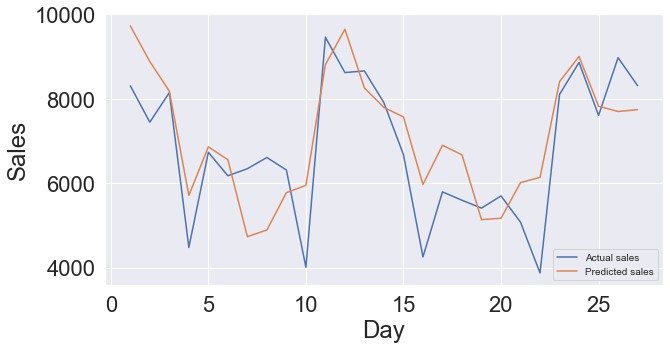

In [109]:
# store3: store type a, mid distance
store_0 = df.loc[df['Store'] == 3] 
store_0_test = df_test.loc[df_test['Store'] == 3]
store_0_sales = pd.DataFrame(store_0, columns = ['Date', 'Sales'])
store_0_sales['Date'] = pd.to_datetime(store_0_sales['Date'])
store_0_sales.set_index('Date', inplace = True)
model = get_model(store_0_sales['Sales'], store_0['StoreType'].iloc[0], store_0['CompetitionDistance'].iloc[0]) 
model_results = model.fit()
pred = model_results.forecast(steps = 31, dynamic = True, typ = 'levels')
store_0_result = pd.DataFrame(store_0_test, columns = ['Date', 'Sales'])
store_0_pred_list = []
for i in range(len(store_0_result['Date'])):
    store_0_pred_list.append(round(pred.iloc[i]))
store_0_result.insert(2, 'Pred_Sales', store_0_pred_list, True)
print(store_0_result)
print('Actual Total Sales for the next 30 days:', store_0_result['Sales'].sum())
print('Predicted Total Sales for the next 30 days:', store_0_result['Pred_Sales'].sum())
diff = store_0_result['Sales'].sum() - store_0_result['Pred_Sales'].sum()
print('Difference betwen actual total sales and predicted total sales:', diff)
x = [i for i in range(1,len(store_0_result['Sales'])+1,1)]
plt.figure(figsize=(10,5))
plt.plot(x,store_0_result['Sales'], label = "Actual sales")
plt.plot(x,store_0_result['Pred_Sales'], label = "Predicted sales")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend(loc=4, prop={'size': 10})
plt.show()

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


             Date  Sales  Pred_Sales
839130 2015-07-01   6253        5784
839131 2015-07-02   6035        4964
839132 2015-07-03   4475        5540
839133 2015-07-04   2240        2569
839134 2015-07-06   4328        5219
839135 2015-07-07   4036        4406
839136 2015-07-08   4990        3371
839137 2015-07-09   4601        3888
839138 2015-07-10   4252        4192
839139 2015-07-11   2023        3229
839140 2015-07-13   7425        7023
839141 2015-07-14   6144        5718
839142 2015-07-15   6323        5077
839143 2015-07-16   4963        5303
839144 2015-07-17   4355        4578
839145 2015-07-18   2108        3477
839146 2015-07-20   4183        5246
839147 2015-07-21   3497        4062
839148 2015-07-22   3595        3798
839149 2015-07-23   3713        3783
839150 2015-07-24   3815        4146
839151 2015-07-25   2030        4379
839152 2015-07-27   7059        6113
839153 2015-07-28   6083        5578
839154 2015-07-29   5899        4937
839155 2015-07-30   4943        4775
8

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


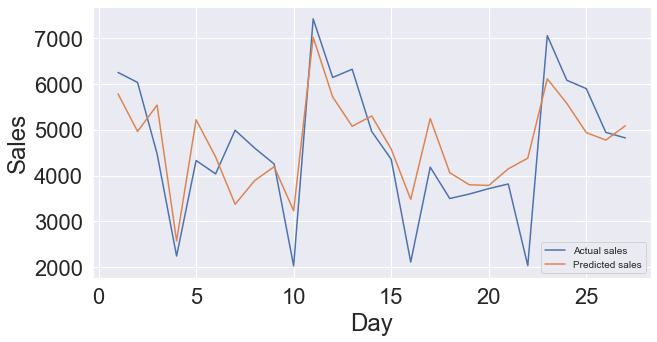

In [110]:
# store5: store type a, large distance
store_0 = df.loc[df['Store'] == 5] 
store_0_test = df_test.loc[df_test['Store'] == 5]
store_0_sales = pd.DataFrame(store_0, columns = ['Date', 'Sales'])
store_0_sales['Date'] = pd.to_datetime(store_0_sales['Date'])
store_0_sales.set_index('Date', inplace = True)
model = get_model(store_0_sales['Sales'], store_0['StoreType'].iloc[0], store_0['CompetitionDistance'].iloc[0]) 
model_results = model.fit()
pred = model_results.forecast(steps = 31, dynamic = True, typ = 'levels')
store_0_result = pd.DataFrame(store_0_test, columns = ['Date', 'Sales'])
store_0_pred_list = []
for i in range(len(store_0_result['Date'])):
    store_0_pred_list.append(round(pred.iloc[i]))
store_0_result.insert(2, 'Pred_Sales', store_0_pred_list, True)
print(store_0_result)
print('Actual Total Sales for the next 30 days:', store_0_result['Sales'].sum())
print('Predicted Total Sales for the next 30 days:', store_0_result['Pred_Sales'].sum())
diff = store_0_result['Sales'].sum() - store_0_result['Pred_Sales'].sum()
print('Difference betwen actual total sales and predicted total sales:', diff)
x = [i for i in range(1,len(store_0_result['Sales'])+1,1)]
plt.figure(figsize=(10,5))
plt.plot(x,store_0_result['Sales'], label = "Actual sales")
plt.plot(x,store_0_result['Pred_Sales'], label = "Predicted sales")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend(loc=4, prop={'size': 10})
plt.show()

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            Date  Sales  Pred_Sales
14736 2015-07-01  17728       24341
14737 2015-07-02  15360       20266
14738 2015-07-03  13533       17375
14739 2015-07-04   7874       10924
14740 2015-07-05   7142        8216
14741 2015-07-06  11574       13441
14742 2015-07-07  11208       12693
14743 2015-07-08  12384       10757
14744 2015-07-09  11849       11438
14745 2015-07-10  11961       11259
14746 2015-07-11   8969        8226
14747 2015-07-12   8456        7988
14748 2015-07-13  21279       21698
14749 2015-07-14  19259       21791
14750 2015-07-15  18097       20837
14751 2015-07-16  17082       17680
14752 2015-07-17  14182       15795
14753 2015-07-18   8426       10562
14754 2015-07-19   7518        8653
14755 2015-07-20  12794       14743
14756 2015-07-21  11977       13654
14757 2015-07-22  12157       10891
14758 2015-07-23  11568       11346
14759 2015-07-24  10969       11115
14760 2015-07-25   6786        7636
14761 2015-07-26   7988        7123
14762 2015-07-27  20024     

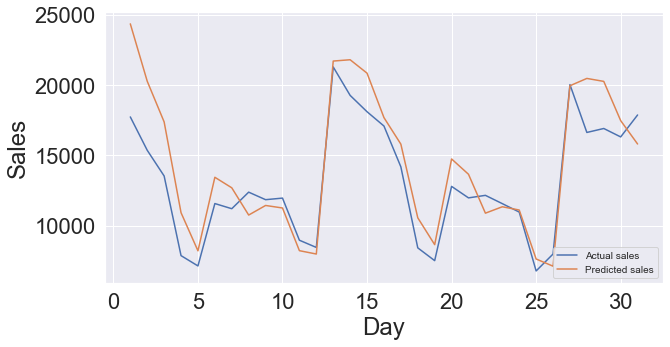

In [111]:
# store 335: store type b, low distance
store_0 = df.loc[df['Store'] == 335] 
store_0_test = df_test.loc[df_test['Store'] == 335]
store_0_sales = pd.DataFrame(store_0, columns = ['Date', 'Sales'])
store_0_sales['Date'] = pd.to_datetime(store_0_sales['Date'])
store_0_sales.set_index('Date', inplace = True)
model = get_model(store_0_sales['Sales'], store_0['StoreType'].iloc[0], store_0['CompetitionDistance'].iloc[0]) 
model_results = model.fit()
pred = model_results.forecast(steps = 31, dynamic = True, typ = 'levels')
store_0_result = pd.DataFrame(store_0_test, columns = ['Date', 'Sales'])
store_0_pred_list = []
for i in range(len(store_0_result['Date'])):
    store_0_pred_list.append(round(pred.iloc[i]))
store_0_result.insert(2, 'Pred_Sales', store_0_pred_list, True)
print(store_0_result)
print('Actual Total Sales for the next 30 days:', store_0_result['Sales'].sum())
print('Predicted Total Sales for the next 30 days:', store_0_result['Pred_Sales'].sum())
diff = store_0_result['Sales'].sum() - store_0_result['Pred_Sales'].sum()
print('Difference betwen actual total sales and predicted total sales:', diff)
x = [i for i in range(1,len(store_0_result['Sales'])+1,1)]
plt.figure(figsize=(10,5))
plt.plot(x,store_0_result['Sales'], label = "Actual sales")
plt.plot(x,store_0_result['Pred_Sales'], label = "Predicted sales")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend(loc=4, prop={'size': 10})
plt.show()

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            Date  Sales  Pred_Sales
10259 2015-07-01   7820        7303
10260 2015-07-02   7553        7469
10261 2015-07-03   8581        7762
10262 2015-07-04   5347        5618
10263 2015-07-05  12070       11201
10264 2015-07-06   6584        6980
10265 2015-07-07   5215        6051
10266 2015-07-08   6705        5684
10267 2015-07-09   5766        6001
10268 2015-07-10   6471        6239
10269 2015-07-11   5383        5235
10270 2015-07-12  13183       11383
10271 2015-07-13   9198        8756
10272 2015-07-14   7626        6989
10273 2015-07-15   7476        7189
10274 2015-07-16   6985        7456
10275 2015-07-17   7750        7809
10276 2015-07-18   5424        5829
10277 2015-07-19  13275       11263
10278 2015-07-20   6502        7311
10279 2015-07-21   5206        6341
10280 2015-07-22   5504        5614
10281 2015-07-23   5223        5967
10282 2015-07-24   5791        6055
10283 2015-07-25   5099        4982
10284 2015-07-26  11421       11180
10285 2015-07-27   7788     

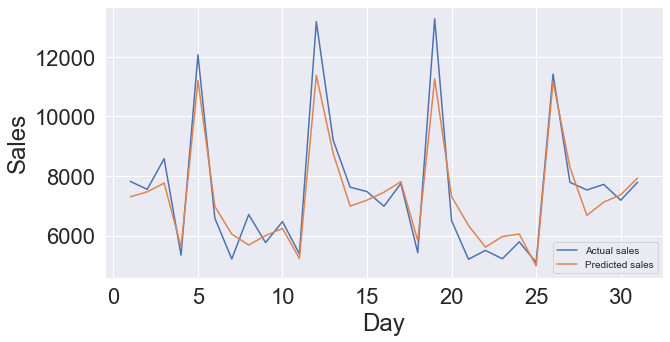

In [112]:
# store 85: store type b, mid distance
store_0 = df.loc[df['Store'] == 85] 
store_0_test = df_test.loc[df_test['Store'] == 85]
store_0_sales = pd.DataFrame(store_0, columns = ['Date', 'Sales'])
store_0_sales['Date'] = pd.to_datetime(store_0_sales['Date'])
store_0_sales.set_index('Date', inplace = True)
model = get_model(store_0_sales['Sales'], store_0['StoreType'].iloc[0], store_0['CompetitionDistance'].iloc[0]) 
model_results = model.fit()
pred = model_results.forecast(steps = 31, dynamic = True, typ = 'levels')
store_0_result = pd.DataFrame(store_0_test, columns = ['Date', 'Sales'])
store_0_pred_list = []
for i in range(len(store_0_result['Date'])):
    store_0_pred_list.append(round(pred.iloc[i]))
store_0_result.insert(2, 'Pred_Sales', store_0_pred_list, True)
print(store_0_result)
print('Actual Total Sales for the next 30 days:', store_0_result['Sales'].sum())
print('Predicted Total Sales for the next 30 days:', store_0_result['Pred_Sales'].sum())
diff = store_0_result['Sales'].sum() - store_0_result['Pred_Sales'].sum()
print('Difference betwen actual total sales and predicted total sales:', diff)
x = [i for i in range(1,len(store_0_result['Sales'])+1,1)]
plt.figure(figsize=(10,5))
plt.plot(x,store_0_result['Sales'], label = "Actual sales")
plt.plot(x,store_0_result['Pred_Sales'], label = "Predicted sales")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend(loc=4, prop={'size': 10})
plt.show()

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


              Date  Sales  Pred_Sales
325385  2015-07-01  12712       12942
325386  2015-07-02  12263       11727
325387  2015-07-03  10709       11227
325388  2015-07-04   8243       10939
325389  2015-07-05      0         788
325390  2015-07-06  12496       12170
325391  2015-07-07   8802       11055
325392  2015-07-08   9246       10139
325393  2015-07-09  10159        9272
325394  2015-07-10   9300        9436
325395  2015-07-11   7996        8931
325396  2015-07-12      0        -214
325397  2015-07-13  11899       11600
325398  2015-07-14  12233       12585
325399  2015-07-15  12171       11492
325400  2015-07-16  12281       11103
325401  2015-07-17   9155       10648
325402  2015-07-18   7861       10723
325403  2015-07-19      0        1523
325404  2015-07-20  10493       11557
325405  2015-07-21   8718       10841
325406  2015-07-22   9047        9697
325407  2015-07-23   8323        9221
325408  2015-07-24   7165        9317
325409  2015-07-25   7285        9004
325410  2015

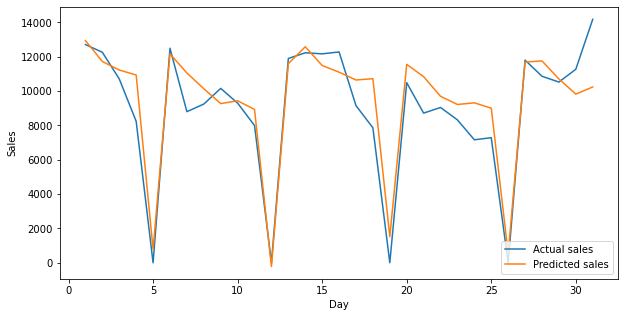

In [12]:
# store 25: store type c, low distance
store_0 = df.loc[df['Store'] == 25] 
store_0_test = df_test.loc[df_test['Store'] == 25]
store_0_sales = pd.DataFrame(store_0, columns = ['Date', 'Sales'])
store_0_sales['Date'] = pd.to_datetime(store_0_sales['Date'])
store_0_sales.set_index('Date', inplace = True)
model = get_model(store_0_sales['Sales'], store_0['StoreType'].iloc[0], store_0['CompetitionDistance'].iloc[0]) 
model_results = model.fit()
pred = model_results.forecast(steps = 31, dynamic = True, typ = 'levels')
store_0_result = pd.DataFrame(store_0_test, columns = ['Date', 'Sales'])
store_0_pred_list = []
for i in range(len(store_0_result['Date'])):
    store_0_pred_list.append(round(pred.iloc[i]))
store_0_result.insert(2, 'Pred_Sales', store_0_pred_list, True)
print(store_0_result)
print('Actual Total Sales for the next 30 days:', store_0_result['Sales'].sum())
print('Predicted Total Sales for the next 30 days:', store_0_result['Pred_Sales'].sum())
diff = store_0_result['Sales'].sum() - store_0_result['Pred_Sales'].sum()
print('Difference betwen actual total sales and predicted total sales:', diff)
x = [i for i in range(1,len(store_0_result['Sales'])+1,1)]
plt.figure(figsize=(10,5))
plt.plot(x,store_0_result['Sales'], label = "Actual sales")
plt.plot(x,store_0_result['Pred_Sales'], label = "Predicted sales")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend(loc=4, prop={'size': 10})
plt.show()

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


              Date  Sales  Pred_Sales
368003  2015-07-01   6907        7610
368004  2015-07-02   7953        7664
368005  2015-07-03   7024        7102
368006  2015-07-04   5594        7462
368007  2015-07-05      0         158
368008  2015-07-06   5393        5487
368009  2015-07-07   4782        4854
368010  2015-07-08   5547        4702
368011  2015-07-09   6247        5150
368012  2015-07-10   6337        5876
368013  2015-07-11   7293        7262
368014  2015-07-12      0         619
368015  2015-07-13   9105        8082
368016  2015-07-14   7779        7171
368017  2015-07-15   7088        7295
368018  2015-07-16   7506        7006
368019  2015-07-17   7645        6971
368020  2015-07-18   7017        7436
368021  2015-07-19      0         121
368022  2015-07-20   5804        6066
368023  2015-07-21   5149        5417
368024  2015-07-22   4802        5192
368025  2015-07-23   5196        5680
368026  2015-07-24   5547        6006
368027  2015-07-25   6547        7267
368028  2015

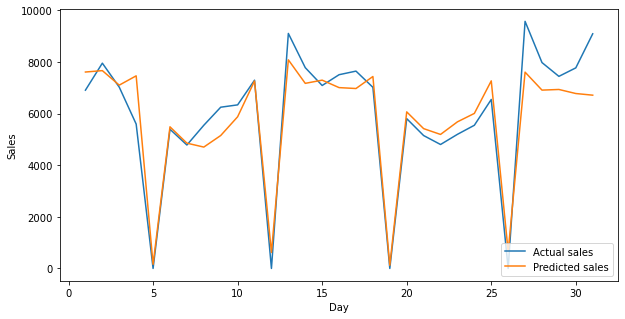

In [13]:
# store 37: store type c, mid distance
store_0 = df.loc[df['Store'] == 37] 
store_0_test = df_test.loc[df_test['Store'] == 37]
store_0_sales = pd.DataFrame(store_0, columns = ['Date', 'Sales'])
store_0_sales['Date'] = pd.to_datetime(store_0_sales['Date'])
store_0_sales.set_index('Date', inplace = True)
model = get_model(store_0_sales['Sales'], store_0['StoreType'].iloc[0], store_0['CompetitionDistance'].iloc[0]) 
model_results = model.fit()
pred = model_results.forecast(steps = 31, dynamic = True, typ = 'levels')
store_0_result = pd.DataFrame(store_0_test, columns = ['Date', 'Sales'])
store_0_pred_list = []
for i in range(len(store_0_result['Date'])):
    store_0_pred_list.append(round(pred.iloc[i]))
store_0_result.insert(2, 'Pred_Sales', store_0_pred_list, True)
print(store_0_result)
print('Actual Total Sales for the next 30 days:', store_0_result['Sales'].sum())
print('Predicted Total Sales for the next 30 days:', store_0_result['Pred_Sales'].sum())
diff = store_0_result['Sales'].sum() - store_0_result['Pred_Sales'].sum()
print('Difference betwen actual total sales and predicted total sales:', diff)
x = [i for i in range(1,len(store_0_result['Sales'])+1,1)]
plt.figure(figsize=(10,5))
plt.plot(x,store_0_result['Sales'], label = "Actual sales")
plt.plot(x,store_0_result['Pred_Sales'], label = "Predicted sales")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend(loc=4, prop={'size': 10})
plt.show()

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


              Date  Sales  Pred_Sales
836735  2015-07-01   9383       10044
836736  2015-07-02   7997        7760
836737  2015-07-03   8832        7885
836738  2015-07-04   6590        8093
836739  2015-07-05      0         276
836740  2015-07-06   7962        7725
836741  2015-07-07   6188        6040
836742  2015-07-08   6966        5461
836743  2015-07-09   6955        4777
836744  2015-07-10   6092        6246
836745  2015-07-11   6569        7441
836746  2015-07-12      0         290
836747  2015-07-13  11982        9747
836748  2015-07-14   9321        9571
836749  2015-07-15   8742        9418
836750  2015-07-16   8233        7543
836751  2015-07-17   7063        7468
836752  2015-07-18   7783        8043
836753  2015-07-19      0         374
836754  2015-07-20   7319        8128
836755  2015-07-21   6063        6871
836756  2015-07-22   5700        6052
836757  2015-07-23   5756        5139
836758  2015-07-24   6097        6536
836759  2015-07-25   6744        7784
836760  2015

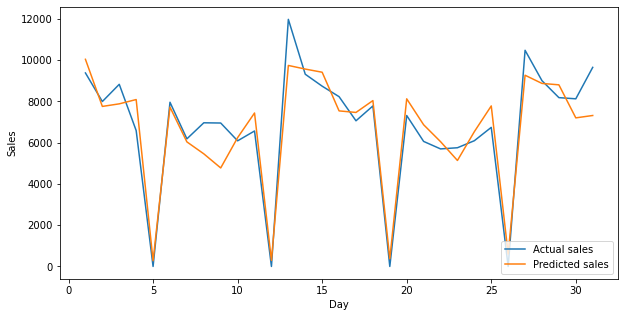

In [14]:
# store 579: store type c, large distance
store_0 = df.loc[df['Store'] == 579] 
store_0_test = df_test.loc[df_test['Store'] == 579]
store_0_sales = pd.DataFrame(store_0, columns = ['Date', 'Sales'])
store_0_sales['Date'] = pd.to_datetime(store_0_sales['Date'])
store_0_sales.set_index('Date', inplace = True)
model = get_model(store_0_sales['Sales'], store_0['StoreType'].iloc[0], store_0['CompetitionDistance'].iloc[0]) 
model_results = model.fit()
pred = model_results.forecast(steps = 31, dynamic = True, typ = 'levels')
store_0_result = pd.DataFrame(store_0_test, columns = ['Date', 'Sales'])
store_0_pred_list = []
for i in range(len(store_0_result['Date'])):
    store_0_pred_list.append(round(pred.iloc[i]))
store_0_result.insert(2, 'Pred_Sales', store_0_pred_list, True)
print(store_0_result)
print('Actual Total Sales for the next 30 days:', store_0_result['Sales'].sum())
print('Predicted Total Sales for the next 30 days:', store_0_result['Pred_Sales'].sum())
diff = store_0_result['Sales'].sum() - store_0_result['Pred_Sales'].sum()
print('Difference betwen actual total sales and predicted total sales:', diff)
x = [i for i in range(1,len(store_0_result['Sales'])+1,1)]
plt.figure(figsize=(10,5))
plt.plot(x,store_0_result['Sales'], label = "Actual sales")
plt.plot(x,store_0_result['Pred_Sales'], label = "Predicted sales")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend(loc=4, prop={'size': 10})
plt.show()

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


              Date  Sales  Pred_Sales
346315  2015-07-01   6796        6232
346316  2015-07-02   5652        3770
346317  2015-07-03   8948        4774
346318  2015-07-04   3906        4656
346319  2015-07-05      0         154
346320  2015-07-06   3055        3780
346321  2015-07-07   3129        4418
346322  2015-07-08   3709        3962
346323  2015-07-09   4350        4658
346324  2015-07-10   3639        4364
346325  2015-07-11   4031        4815
346326  2015-07-12      0         566
346327  2015-07-13   7525        5931
346328  2015-07-14   6422        5818
346329  2015-07-15  10334        5796
346330  2015-07-16   5921        3909
346331  2015-07-17   5740        4354
346332  2015-07-18   4956        4853
346333  2015-07-19      0         515
346334  2015-07-20   3868        4274
346335  2015-07-21   3080        4752
346336  2015-07-22   3164        3953
346337  2015-07-23   3959        4231
346338  2015-07-24   3483        4448
346339  2015-07-25   4361        5019
346340  2015

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


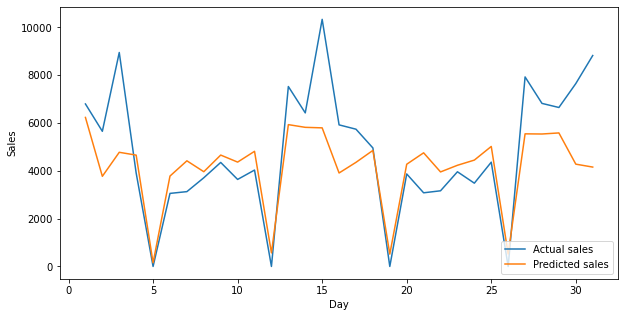

In [15]:
# store 13: store type d, low distance
store_0 = df.loc[df['Store'] == 13] 
store_0_test = df_test.loc[df_test['Store'] == 13]
store_0_sales = pd.DataFrame(store_0, columns = ['Date', 'Sales'])
store_0_sales['Date'] = pd.to_datetime(store_0_sales['Date'])
store_0_sales.set_index('Date', inplace = True)
model = get_model(store_0_sales['Sales'], store_0['StoreType'].iloc[0], store_0['CompetitionDistance'].iloc[0]) 
model_results = model.fit()
pred = model_results.forecast(steps = 31, dynamic = True, typ = 'levels')
store_0_result = pd.DataFrame(store_0_test, columns = ['Date', 'Sales'])
store_0_pred_list = []
for i in range(len(store_0_result['Date'])):
    store_0_pred_list.append(round(pred.iloc[i]))
store_0_result.insert(2, 'Pred_Sales', store_0_pred_list, True)
print(store_0_result)
print('Actual Total Sales for the next 30 days:', store_0_result['Sales'].sum())
print('Predicted Total Sales for the next 30 days:', store_0_result['Pred_Sales'].sum())
diff = store_0_result['Sales'].sum() - store_0_result['Pred_Sales'].sum()
print('Difference betwen actual total sales and predicted total sales:', diff)
x = [i for i in range(1,len(store_0_result['Sales'])+1,1)]
plt.figure(figsize=(10,5))
plt.plot(x,store_0_result['Sales'], label = "Actual sales")
plt.plot(x,store_0_result['Pred_Sales'], label = "Predicted sales")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend(loc=4, prop={'size': 10})
plt.show()

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


              Date  Sales  Pred_Sales
327269  2015-07-01   7580        6896
327270  2015-07-02   6242        4855
327271  2015-07-03   6202        6344
327272  2015-07-04   3810        5078
327273  2015-07-05      0         427
327274  2015-07-06   5393        4870
327275  2015-07-07   3914        4382
327276  2015-07-08   4294        4856
327277  2015-07-09   4986        3694
327278  2015-07-10   4850        5158
327279  2015-07-11   4219        3955
327280  2015-07-12      0         602
327281  2015-07-13   8687        7559
327282  2015-07-14   7596        6572
327283  2015-07-15   5604        5981
327284  2015-07-16   5822        4177
327285  2015-07-17   5551        5962
327286  2015-07-18   4364        5165
327287  2015-07-19      0         414
327288  2015-07-20   5729        5487
327289  2015-07-21   4089        4867
327290  2015-07-22   4364        5354
327291  2015-07-23   4311        4160
327292  2015-07-24   4483        5339
327293  2015-07-25   4191        4226
327294  2015

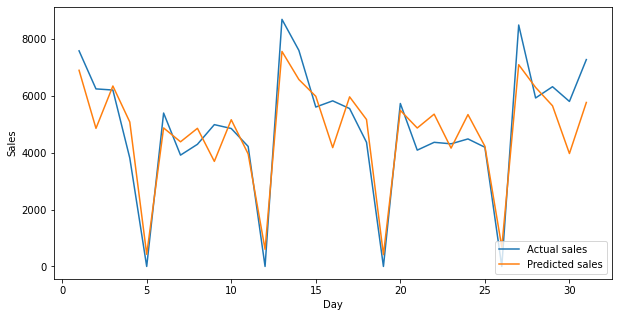

In [16]:
# store 23: store type d, mid distance
store_0 = df.loc[df['Store'] == 23] 
store_0_test = df_test.loc[df_test['Store'] == 23]
store_0_sales = pd.DataFrame(store_0, columns = ['Date', 'Sales'])
store_0_sales['Date'] = pd.to_datetime(store_0_sales['Date'])
store_0_sales.set_index('Date', inplace = True)
model = get_model(store_0_sales['Sales'], store_0['StoreType'].iloc[0], store_0['CompetitionDistance'].iloc[0]) 
model_results = model.fit()
pred = model_results.forecast(steps = 31, dynamic = True, typ = 'levels')
store_0_result = pd.DataFrame(store_0_test, columns = ['Date', 'Sales'])
store_0_pred_list = []
for i in range(len(store_0_result['Date'])):
    store_0_pred_list.append(round(pred.iloc[i]))
store_0_result.insert(2, 'Pred_Sales', store_0_pred_list, True)
print(store_0_result)
print('Actual Total Sales for the next 30 days:', store_0_result['Sales'].sum())
print('Predicted Total Sales for the next 30 days:', store_0_result['Pred_Sales'].sum())
diff = store_0_result['Sales'].sum() - store_0_result['Pred_Sales'].sum()
print('Difference betwen actual total sales and predicted total sales:', diff)
x = [i for i in range(1,len(store_0_result['Sales'])+1,1)]
plt.figure(figsize=(10,5))
plt.plot(x,store_0_result['Sales'], label = "Actual sales")
plt.plot(x,store_0_result['Pred_Sales'], label = "Predicted sales")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend(loc=4, prop={'size': 10})
plt.show()

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


              Date  Sales  Pred_Sales
256759  2015-07-01   8547        8103
256760  2015-07-02   7801        6881
256761  2015-07-03   9440        6669
256762  2015-07-04   7596        8874
256763  2015-07-05      0         399
256764  2015-07-06   7941        8417
256765  2015-07-07   6179        7432
256766  2015-07-08   7285        7265
256767  2015-07-09   7627        6758
256768  2015-07-10   6797        7245
256769  2015-07-11   7917        8822
256770  2015-07-12      0         726
256771  2015-07-13  11322        8910
256772  2015-07-14   9115        8041
256773  2015-07-15   8066        7706
256774  2015-07-16   7544        6288
256775  2015-07-17   8463        6273
256776  2015-07-18   8974        8652
256777  2015-07-19      0         546
256778  2015-07-20   8051        8393
256779  2015-07-21   6145        7575
256780  2015-07-22   6207        7458
256781  2015-07-23   8118        6783
256782  2015-07-24   7415        6884
256783  2015-07-25   8577        8794
256784  2015

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


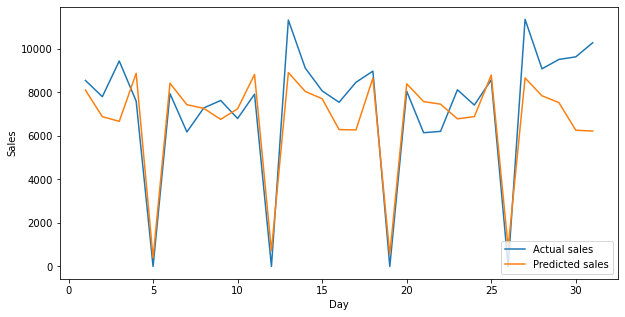

In [17]:
# store 100: store type d, large distance
store_0 = df.loc[df['Store'] == 100] 
store_0_test = df_test.loc[df_test['Store'] == 100]
store_0_sales = pd.DataFrame(store_0, columns = ['Date', 'Sales'])
store_0_sales['Date'] = pd.to_datetime(store_0_sales['Date'])
store_0_sales.set_index('Date', inplace = True)
model = get_model(store_0_sales['Sales'], store_0['StoreType'].iloc[0], store_0['CompetitionDistance'].iloc[0]) 
model_results = model.fit()
pred = model_results.forecast(steps = 31, dynamic = True, typ = 'levels')
store_0_result = pd.DataFrame(store_0_test, columns = ['Date', 'Sales'])
store_0_pred_list = []
for i in range(len(store_0_result['Date'])):
    store_0_pred_list.append(round(pred.iloc[i]))
store_0_result.insert(2, 'Pred_Sales', store_0_pred_list, True)
print(store_0_result)
print('Actual Total Sales for the next 30 days:', store_0_result['Sales'].sum())
print('Predicted Total Sales for the next 30 days:', store_0_result['Pred_Sales'].sum())
diff = store_0_result['Sales'].sum() - store_0_result['Pred_Sales'].sum()
print('Difference betwen actual total sales and predicted total sales:', diff)
x = [i for i in range(1,len(store_0_result['Sales'])+1,1)]
plt.figure(figsize=(10,5))
plt.plot(x,store_0_result['Sales'], label = "Actual sales")
plt.plot(x,store_0_result['Pred_Sales'], label = "Predicted sales")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend(loc=4, prop={'size': 10})
plt.show()

In [18]:
'''
To predict all stores, we can use a loop. It'll take up to 55 hours.
'''

# store_count = len(store['Store'])
# for i in range(store_count):
#     store_0 = df.loc[df['Store'] == i+1] 
#     store_0_test = df_test.loc[df_test['Store'] == i+1]
#     store_0_sales = pd.DataFrame(store_0, columns = ['Date', 'Sales'])
#     store_0_sales['Date'] = pd.to_datetime(store_0_sales['Date'])
#     store_0_sales.set_index('Date', inplace = True)
#     model = get_model(store_0_sales['Sales'], store_0['StoreType'].iloc[0], store_0['CompetitionDistance'].iloc[0]) 
#     model_results = model.fit()
#     pred = model_results.forecast(steps = 31, dynamic = True, typ = 'levels')
#     store_0_result = pd.DataFrame(store_0_test, columns = ['Date', 'Sales'])
#     store_0_pred_list = []
#     for i in range(len(store_0_result['Date'])):
#         store_0_pred_list.append(round(pred.iloc[i]))
#     store_0_result.insert(2, 'Pred_Sales', store_0_pred_list, True)
#     print(store_0_result)
#     print('Actual Total Sales for the next 30 days:', store_0_result['Sales'].sum())
#     print('Predicted Total Sales for the next 30 days:', store_0_result['Pred_Sales'].sum())
#     diff = store_0_result['Sales'].sum() - store_0_result['Pred_Sales'].sum()
#     print('Difference betwen actual total sales and predicted total sales:', diff)
#     x = [i for i in range(1,len(store_0_result['Sales'])+1,1)]
#     plt.figure(figsize=(10,5))
#     plt.plot(x,store_0_result['Sales'], label = "Actual sales")
#     plt.plot(x,store_0_result['Pred_Sales'], label = "Predicted sales")
#     plt.xlabel('Day')
#     plt.ylabel('Sales')
#     plt.legend(loc=4, prop={'size': 10})
#     plt.show()


"\nTo predict all stores, we can use a loop. It'll take up to 55 hours.\n"

# FB Prophet

In [19]:
from fbprophet import Prophet

Data Process for Prophet Model

In [20]:
# Load the train and store data
sales_train_df = pd.read_csv("data/train.csv")
store_info_df = pd.read_csv('data/store.csv')

# Filter out the closed days
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]
sales_train_df.drop(['Open'], axis = 1, inplace = True)

# Replace null values with zero
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
    store_info_df[str].fillna(0, inplace=True)

store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

# Merge sales and stores data together
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

# OHE on data object
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

# Implement seperated holidays features (need to plug in prophet manually)
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') | 
                                    (sales_train_all_df['StateHoliday'] == 'b') |
                                    (sales_train_all_df['StateHoliday'] == 'c')].loc[:,'Date'].values
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
school_state_holidays = pd.concat((state_holidays, school_holidays))

In [21]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,7
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,5
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,4
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,3


Model Construction

In [22]:
def prophet_predict(store_id, data, periods, holidays=None, test_mode=False):
    '''
        store_id: choose which store you want to forecast 
        data: merged sales data with store data
        periods: future periods you want to forecast
        holidays: holidays may have impact on the result. type:DataFrame. Default is None for simplicity.
        test_mode: if true, we save last 30 days of data for test purpose. if false, then we train all
    '''
    # seperate the train and the test data
    data = data[data['Store'] == store_id]
    data = data[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    data = data.sort_values(by = 'ds')
    if test_mode:
        train_data = data[:-periods]  
    else:  
        train_data = data

    # fit the model and make future prediction
    model = Prophet(holidays=holidays)
    model.fit(train_data)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)

    return model, data, forecast

def plot_forecast(model, forecast):
    figure1 = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)
    return

Model Evaluation

In [23]:
prophet_holiday_model, holiday_data, holiday_forecast = \
    prophet_predict(1, sales_train_all_df, 30, school_state_holidays, True)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
# seperate the prediction data from the output
# Prophet needs to rename the Date to ds and y_pred to yhat.
final_pred = holiday_forecast[["ds","yhat"]]
final_pred

,ds,yhat
0,2013-01-02,5546.134099
1,2013-01-03,5325.367084
2,2013-01-04,5477.282880
3,2013-01-05,5781.106812
4,2013-01-07,5691.243212
...,...,...
776,2015-07-22,4412.223798
777,2015-07-23,4294.739798
778,2015-07-24,4535.242106
779,2015-07-25,4912.295353


In [25]:
# Calculate the sum of the last month (test data)
y_test_total = holiday_data[-30:]["y"].sum()
y_pred_total = final_pred[-30:]["yhat"].sum()

In [26]:
print("Actual Sales Total:", y_test_total)

Actual Sales Total: 136217


In [27]:
print("Predicted Sales Total:", y_pred_total)

Predicted Sales Total: 132672.04410380937


In [28]:
print("Error rate: ", 100*(abs(y_pred_total-y_test_total)/y_test_total), "%")

Error rate:  2.602432806617845 %


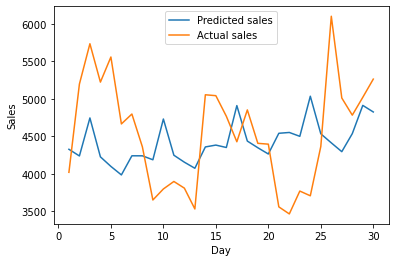

In [29]:
y_test = holiday_data[-30:]["y"]
y_pred = final_pred[-30:]["yhat"]

x = [i for i in range(1,31,1)]
plt.plot(x, y_pred, label = 'Predicted sales')
plt.plot(x, y_test, label = 'Actual sales')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [30]:
from sklearn import metrics
print("Error on test",metrics.mean_absolute_error(y_pred,y_test))

Error on test 637.9753704549931
